For this assignment, the task is to solve various Text Analysis problems using the Jupiter notebook, a web-based interactive development environment for notebooks, Python code, and data.  EvolutionAI has collected a dataset of roughly 1M text Reddit posts, with 1013 distinct classes (1000 examples per class). The classes are based on the assumed ‘topic’ of the text post, the topics being a manually curated taxonomy based on subreddits. The dataset given is called “reddit_5.csv”. It consists of 5000 articles from Reddit posts. Each of these documents belongs to one of the categories mentioned above. In the CSV file, there are two columns. The first column refers to the category the document belongs to, and the second column contains the document's contents.

Our exploration is structured into three cohesive steps, each contributing to a comprehensive understanding of the dataset before building the Text Classification Modeling. These steps are listed below.

This problem will be approached in the following 3 distinct steps:
1.	Text Data Preprocessing (Individual)
2.	Text Data Understanding (Individual)
3.	Classification Modeling (Group)

Sentiment anaylsis

In [1]:
## import the required packages
import nltk
import pandas as pd
import re

from sklearn.preprocessing import OneHotEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, fbeta_score, roc_auc_score, ConfusionMatrixDisplay
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
import string
import numpy as np
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules
from mlxtend.preprocessing import TransactionEncoder
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.utils import resample
from sklearn.metrics import roc_curve, roc_auc_score
%matplotlib inline
nltk.download("wordnet")
from nltk.stem.snowball import SnowballStemmer
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\huang\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


# Problem1

## 1. Text Data Preprocessing

### 1.1 Load the Text Data

In [2]:
## Read the reddit_5.csv file
data = pd.read_csv('reddit_5.csv')

In [3]:
data.head()

,text,category
0,This is just an hypothesis on how I imagine an...,soccer
1,"Hey community, I want to get your opinion on w...",snowboarding
2,I have a roubaix road bike with aero bars and ...,triathlon
3,Out of the u17 World Cup winners “top prospect...,soccer
4,A while ago I quit Judo and since then I've da...,judo


In [4]:
## Number of value for each colume and the type of it
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   text      5000 non-null   object
 1   category  5000 non-null   object
dtypes: object(2)
memory usage: 78.3+ KB


In [5]:
## The number of each category
data['category'].value_counts()

soccer          1000
snowboarding    1000
triathlon       1000
judo            1000
surfing         1000
Name: category, dtype: int64

### 1.2 Cleanse the Text Data

In [6]:
data['text'][0]

"This is just an hypothesis on how I imagine an European league, with the relegation of just one team:<lb><lb>**Champions League** is the main league and consists of 20 teams:<lb><lb>(at the time of writing the first 20 teams of UEFA ranking)<lb><lb>* Real Madrid CF<lb>* Club Atlético de Madrid<lb>* FC Barcelona<lb>* FC Bayern München<lb>* Juventus<lb>* Sevilla FC<lb>* Paris Saint-Germain<lb>* Manchester City FC<lb>* Borussia Dortmund<lb>* SL Benfica<lb>* Arsenal FC<lb>* SSC Napoli<lb>* FC Porto<lb>* Chelsea FC<lb>* Manchester United FC<lb>* Bayer 04 Leverkusen<lb>* FC Shakhtar Donetsk<lb>* FC Zenit<lb>* FC Schalke 04<lb>* Tottenham Hotspur FC<lb><lb>At the end of regular season:<lb>Teams placed from 1 to 8 qualify for Play-Off, which will determine the European champion with a Final Game<lb><lb><lb>Teams placed from 13 to 20 will do Play-Out<lb><lb>A final game will determine the team that relegates<lb><lb>Only one team relegates.<lb><lb><lb>Relegated team will go back and play in its

In [7]:
## Preprocess the text
## Lowercasing all characters, removing tags and removing special characters and digits

def clean_text(text):
    
    ## lowercase
    text=text.lower()
    
    ## remove tags through the use of regular expressions
    text=re.sub("</?.*?>"," <> ",text)
    
    ## remove special characters and digits through the use of regular expressions
    text=re.sub("(\\d|\\W|_)+"," ",text)
    
    return text

data['text_clean'] = data['text'].apply(lambda x:clean_text(x))

In [8]:
## Tokenizing the text

def tokenize_text(text):
    tokens = re.split('\W+', text)
    return tokens

data['text_tokenized'] = data['text_clean'].apply(lambda x:tokenize_text(x))

<>:4: DeprecationWarning: invalid escape sequence '\W'
<>:4: DeprecationWarning: invalid escape sequence '\W'
C:\Users\huang\AppData\Local\Temp\ipykernel_5260\3552319981.py:4: DeprecationWarning: invalid escape sequence '\W'
  tokens = re.split('\W+', text)


In [9]:
## Removing stopwords
def get_stop_words(stop_file_path):
    """load stop words """
    
    with open(stop_file_path, 'r', encoding="utf-8") as f:
        stopwords = f.readlines()
        stop_set = set(m.strip() for m in stopwords)
        return list(stop_set)

def remove_stopwords(text):
    text = [word for word in text if word not in stopwords]
    return text

stopwords = get_stop_words(r'stopwords.txt')

data['text_no_stopwords'] = data['text_tokenized'].apply(lambda x:remove_stopwords(x))

In [10]:
## Lemmatization
wn = nltk.WordNetLemmatizer()
def lemmatize_text(text):
    text = [wn.lemmatize(word) for word in text]
    return text

data['text_lemmatized'] = data['text_no_stopwords'].apply(lambda x:lemmatize_text(x))

In [11]:
## Joining back all the words(lemmatized)
def joiner(text):
    text = " ".join(text)
    return text

data['text_final1'] = data['text_lemmatized'].apply(lambda x:joiner(x))

In [12]:
data.head()

,text,category,text_clean,text_tokenized,text_no_stopwords,text_lemmatized,text_final1
0,This is just an hypothesis on how I imagine an...,soccer,this is just an hypothesis on how i imagine an...,"[this, is, just, an, hypothesis, on, how, i, i...","[hypothesis, imagine, european, league, relega...","[hypothesis, imagine, european, league, relega...",hypothesis imagine european league relegation ...
1,"Hey community, I want to get your opinion on w...",snowboarding,hey community i want to get your opinion on wh...,"[hey, community, i, want, to, get, your, opini...","[hey, community, opinion, vail, resorts, mount...","[hey, community, opinion, vail, resort, mounta...",hey community opinion vail resort mountain pas...
2,I have a roubaix road bike with aero bars and ...,triathlon,i have a roubaix road bike with aero bars and ...,"[i, have, a, roubaix, road, bike, with, aero, ...","[roubaix, road, bike, aero, bars, using, preva...","[roubaix, road, bike, aero, bar, using, prevai...",roubaix road bike aero bar using prevail bit o...
3,Out of the u17 World Cup winners “top prospect...,soccer,out of the u world cup winners top prospects w...,"[out, of, the, u, world, cup, winners, top, pr...","[world, cup, winners, top, prospects, players,...","[world, cup, winner, top, prospect, player, ca...",world cup winner top prospect player career fa...
4,A while ago I quit Judo and since then I've da...,judo,a while ago i quit judo and since then i ve da...,"[a, while, ago, i, quit, judo, and, since, the...","[ago, quit, judo, ve, dabbled, lot, martial, a...","[ago, quit, judo, ve, dabbled, lot, martial, a...",ago quit judo ve dabbled lot martial art recen...


In [13]:
text_final1 = data['text_final1']
text_final1[0]

'hypothesis imagine european league relegation team champion league main league consists team time writing team uefa ranking real madrid cf club atlético de madrid fc barcelona fc bayern münchen juventus sevilla fc paris saint germain manchester city fc borussia dortmund sl benfica arsenal fc ssc napoli fc porto chelsea fc manchester united fc bayer leverkusen fc shakhtar donetsk fc zenit fc schalke tottenham hotspur fc regular season team placed qualify play determine european champion final game team placed play final game determine team relegates team relegates relegated team play national league premier serie etc uefa league tier consists team win national league sort champion cup winner uefa league play season champion league team champion league play national league national cup add downvotes negative comment concept team super league repeatedly menace closed usa '

In [14]:
text_final1.shape


(5000,)

### 1.3 Bag-of-Word

In [15]:
#create a vocabulary of words, 
#ignore words that appear in 15% of documents, 
#eliminate stop words

count_vect = CountVectorizer(max_df=0.15,stop_words=stopwords, max_features=5000)
text_counts = count_vect.fit_transform(text_final1.tolist())
text_counts.shape

(5000, 5000)

In [16]:
sum_words = text_counts.sum(axis=0)
words_freq = [(word, sum_words[0, idx]) for word, idx in count_vect.vocabulary_.items()]
words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)

In [17]:
print("Number of features")
feature_names = np.array(count_vect.get_feature_names_out())
print(len(feature_names))

Number of features
5000


In [18]:
print('The highest frequency words:')
words_freq[0:20] 

The highest frequency words:


[('board', 1642),
 ('sprite', 1576),
 ('judo', 1533),
 ('team', 1362),
 ('icon', 1316),
 ('bike', 1278),
 ('goal', 1273),
 ('training', 1212),
 ('season', 1100),
 ('www', 1086),
 ('league', 957),
 ('people', 941),
 ('player', 887),
 ('run', 851),
 ('game', 828),
 ('club', 824),
 ('lot', 807),
 ('doing', 798),
 ('feel', 762),
 ('surf', 725)]

In [19]:
print('The lowest frequency words:') 
words_freq[-20:] 

The lowest frequency words:


[('lamela', 7),
 ('argon', 7),
 ('victim', 7),
 ('nainggolan', 7),
 ('sturaro', 7),
 ('stephan', 7),
 ('outstanding', 7),
 ('primeira', 7),
 ('uganda', 7),
 ('chamois', 7),
 ('pennsylvania', 7),
 ('osotogari', 7),
 ('dennis', 7),
 ('prowse', 7),
 ('moon', 7),
 ('ashley', 7),
 ('nominated', 7),
 ('chicharito', 7),
 ('donaldson', 7),
 ('casciaro', 7)]

In [20]:
pd_text_counts = pd.DataFrame(text_counts.toarray())
pd_text_counts.to_csv("HuangWen_WordCount.csv", index=False)

In [21]:
count_vect.get_feature_names_out()

array(['aaron', 'ability', 'able', ..., 'ádám', 'álvaro', 'ángel'],
      dtype=object)

In [22]:
feature_names=np.array(count_vect.get_feature_names_out())
len(count_vect.get_feature_names_out())

5000

In [23]:
pd.DataFrame(text_counts.toarray())

,0,1,2,3,4,5,6,7,8,9,...,4990,4991,4992,4993,4994,4995,4996,4997,4998,4999
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,2,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4996,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4997,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4998,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


### 1.4 TF-IDF

In [24]:
# Generate TF-IDF Matrix
tfidf_transformer=TfidfTransformer(smooth_idf=True, use_idf=True)
text_tfidf = tfidf_transformer.fit_transform(text_counts)

In [25]:
# IDF Vector
tfidf_transformer.idf_

array([7.32016859, 5.28328667, 3.44896758, ..., 8.41878088, 7.7256337 ,
       7.57148302])

In [26]:
# Shape of IDF Vector
tfidf_transformer.idf_.shape

(5000,)

In [27]:
## Features with lowest IDF
sorted_by_idf = np.argsort(tfidf_transformer.idf_)
print("Features with Lowest idf:\n{}".format(
       feature_names[sorted_by_idf[:100]]))

Features with Lowest idf:
['board' 'training' 'people' 'judo' 'lot' 'doing' 'season' 'pretty'
 'getting' 'feel' 'www' 'help' 'month' 'll' 'look' 'hey' 'team' 'question'
 'run' 'bike' 'experience' 'bit' 'start' 'little' 'trying' 'advice' 'goal'
 'ride' 'surf' 'surfing' 're' 'wondering' 'able' 'club' 'love' 'try'
 'game' 'edit' 'started' 'thinking' 'player' 'hi' 'maybe' 'top' 'wave'
 'probably' 'league' 'trip' 'etc' 'match' 'post' 'friend' 'race' 'throw'
 'hour' 'sport' 'half' 'ago' 'didn' 'water' 'couple' 'live' 'hard'
 'currently' 'recently' 'riding' 'idea' 'tip' 'swim' 'found' 'triathlon'
 'won' 'past' 'watch' 'fun' 'else' 'leg' 'mountain' 'level' 'snowboarding'
 'break' 'th' 'tri' 'doesn' 'city' 'running' 'local' 'appreciated'
 'football' 'plan' 'belt' 'foot' 'real' 'train' 'minute' 'spot' 'world'
 'coming' 'suggestion' 'play']


In [28]:
## Features with Highest IDF
print("Features with Highest idf:\n{}".format(
       feature_names[sorted_by_idf[-100:]]))

Features with Highest idf:
['sadio' 'deliberate' 'serbian' 'lewin' 'peralta' 'niasse' 'walsall'
 'presenter' 'petition' 'taça' 'sochaux' 'blah' 'conversion' 'pla'
 'probability' 'são' 'pinning' 'swan' 'uganda' 'prowse' 'philippe'
 'calvert' 'qf' 'uel' 'sumo' 'curacao' 'biesbrouck' 'petros' 'ww' 'brexit'
 'orellana' 'braunschweig' 'osotogari' 'kean' 'mantalos' 'royal'
 'kneeling' 'bielsa' 'amiens' 'rwanda' 'mil' 'oumar' 'jaguares' 'rch'
 'masia' 'wl' 'quassy' 'ádám' 'verbandspokal' 'ka' 'hooligan' 'stunt'
 'chl' 'lff' 'hyun' 'slash' 'lloyd' 'ibra' 'guiana' 'troyes' 'exeter'
 'chang' 'ajaccio' 'fcc' 'saxony' 'chicharito' 'spfc' 'lthr' 'motherwell'
 'mozambique' 'soccerverse' 'ge' 'brest' 'journo' 'zamalek' 'conm'
 'gambling' 'mohun' 'brawling' 'baggio' 'bagan' 'upvote' 'redditpoll'
 'dench' 'cluj' 'skrtl' 'lewy' 'morpeth' 'fathi' 'benelux' 'bengal'
 'lamia' 'antenna' 'roundup' 'xf' 'malaysian' 'casciaro' 'gfc'
 'sandefjord' 'donaldson']


In [29]:
# find maximum value for each of the features over dataset:
max_value = text_tfidf.max(axis=0).toarray().ravel()
sorted_by_tfidf = max_value.argsort()

## Features with Lowest tfidf
print("Features with lowest tfidf:\n{}".format(
      feature_names[sorted_by_tfidf[:20]]))

## Features with Highest tfidf
print("Features with highest tfidf: \n{}".format(
      feature_names[sorted_by_tfidf[-20:]]))

Features with lowest tfidf:
['rebound' 'gameid' 'zaza' 'sané' 'ht' 'sokratis' 'ashley' 'mina'
 'shakhtar' 'livesoccertv' 'lichtsteiner' 'rakitic' 'eduardo' 'mohamed'
 'romelu' 'kickoff' 'donetsk' 'etihad' 'ingolstadt' 'klavan']
Features with highest tfidf: 
['shark' 'prediction' 'sumo' 'pt' 'tottenham' 'kata' 'profit' 'gt' 'forum'
 'amp' 'commute' 'fcb' 'position' 'vote' 'bag' 'mitt' 'icon' 'streamable'
 'iceland' 'sprite']


In [30]:
pd.DataFrame(text_tfidf.toarray())

,0,1,2,3,4,5,6,7,8,9,...,4990,4991,4992,4993,4994,4995,4996,4997,4998,4999
0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
1,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
2,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
3,0.0,0.204571,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.146585
4,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
4996,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
4997,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
4998,0.0,0.000000,0.069337,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000


In [31]:
pd.DataFrame(text_tfidf.toarray()).to_csv("HuangWen_tfidf.csv", index=False)

In [32]:
pd.DataFrame(data['category']).to_csv("y_category.csv", index=False)

## 2. Text Data Understanding

### 2.1 Extract keywords using TF-IDF matrix

In [33]:
idx=0
doc = text_final1[idx]
print(doc)

tf_idf_vector=text_tfidf[idx]
print(tf_idf_vector)

hypothesis imagine european league relegation team champion league main league consists team time writing team uefa ranking real madrid cf club atlético de madrid fc barcelona fc bayern münchen juventus sevilla fc paris saint germain manchester city fc borussia dortmund sl benfica arsenal fc ssc napoli fc porto chelsea fc manchester united fc bayer leverkusen fc shakhtar donetsk fc zenit fc schalke tottenham hotspur fc regular season team placed qualify play determine european champion final game team placed play final game determine team relegates team relegates relegated team play national league premier serie etc uefa league tier consists team win national league sort champion cup winner uefa league play season champion league team champion league play national league national cup add downvotes negative comment concept team super league repeatedly menace closed usa 
  (0, 4989)	0.06591316579852535
  (0, 4943)	0.06195078422058308
  (0, 4897)	0.04914320101161455
  (0, 4891)	0.03940828

In [34]:
tf_idf_vector.shape

(1, 5000)

In [35]:
temp = pd.DataFrame(zip(tf_idf_vector.tocoo().col, tf_idf_vector.tocoo().data),columns=['feature_number','tf_idf'])
temp.sort_values('tf_idf', ascending = False, inplace = True)
temp

,feature_number,tf_idf
46,1530,0.559663
39,2441,0.389460
9,4389,0.349999
61,715,0.220210
28,3224,0.194474
...,...,...
3,4891,0.039408
23,3480,0.038444
59,775,0.038154
48,1421,0.035487


In [36]:
#use only topn items from vector
topn = 7  
topn_items = temp[:topn]

tf_idf = []
word = []

for index, row in topn_items.iterrows():
    fname = feature_names[int(row['feature_number'])]
    #word eg zombie
    word.append(fname)
    #tf_idf eg 0.215
    tf_idf.append(round(row['tf_idf'], 3))  
print(doc, '\n')

result = dict(zip(word, tf_idf)) 
print(result)

hypothesis imagine european league relegation team champion league main league consists team time writing team uefa ranking real madrid cf club atlético de madrid fc barcelona fc bayern münchen juventus sevilla fc paris saint germain manchester city fc borussia dortmund sl benfica arsenal fc ssc napoli fc porto chelsea fc manchester united fc bayer leverkusen fc shakhtar donetsk fc zenit fc schalke tottenham hotspur fc regular season team placed qualify play determine european champion final game team placed play final game determine team relegates team relegates relegated team play national league premier serie etc uefa league tier consists team win national league sort champion cup winner uefa league play season champion league team champion league play national league national cup add downvotes negative comment concept team super league repeatedly menace closed usa  

{'fc': 0.56, 'league': 0.389, 'team': 0.35, 'champion': 0.22, 'play': 0.194, 'national': 0.191, 'uefa': 0.152}


In [37]:
# Taking top 7 keywords based on TF-IDF score from every review/document.

results = []

for idx, doc in text_final1.items():
    #generate tf-idf for the given document
    tf_idf_vector=text_tfidf[idx]
    
    temp = pd.DataFrame(zip(tf_idf_vector.tocoo().col, tf_idf_vector.tocoo().data),columns=['feature_number','tf_idf'])
    temp.sort_values('tf_idf', ascending = False, inplace = True)
    
    #use only topn items from vector
    topn_items = temp[:topn]
    tf_idf = []
    word = []
    
    for index, row in topn_items.iterrows():
        #print(int(row['feature_number']))
        fname = feature_names[int(row['feature_number'])]
        word.append(fname)
        tf_idf.append(round(row['tf_idf'], 3))
    
    result = dict(zip(word, tf_idf))
    results.append(result)


In [38]:
len(results)

5000

In [39]:
data['keywords'] = results
data.head()

,text,category,text_clean,text_tokenized,text_no_stopwords,text_lemmatized,text_final1,keywords
0,This is just an hypothesis on how I imagine an...,soccer,this is just an hypothesis on how i imagine an...,"[this, is, just, an, hypothesis, on, how, i, i...","[hypothesis, imagine, european, league, relega...","[hypothesis, imagine, european, league, relega...",hypothesis imagine european league relegation ...,"{'fc': 0.56, 'league': 0.389, 'team': 0.35, 'c..."
1,"Hey community, I want to get your opinion on w...",snowboarding,hey community i want to get your opinion on wh...,"[hey, community, i, want, to, get, your, opini...","[hey, community, opinion, vail, resorts, mount...","[hey, community, opinion, vail, resort, mounta...",hey community opinion vail resort mountain pas...,"{'vail': 0.487, 'beaver': 0.28, 'creek': 0.255..."
2,I have a roubaix road bike with aero bars and ...,triathlon,i have a roubaix road bike with aero bars and ...,"[i, have, a, roubaix, road, bike, with, aero, ...","[roubaix, road, bike, aero, bars, using, preva...","[roubaix, road, bike, aero, bar, using, prevai...",roubaix road bike aero bar using prevail bit o...,"{'helmet': 0.342, 'decide': 0.326, 'aero': 0.3..."
3,Out of the u17 World Cup winners “top prospect...,soccer,out of the u world cup winners top prospects w...,"[out, of, the, u, world, cup, winners, top, pr...","[world, cup, winners, top, prospects, players,...","[world, cup, winner, top, prospect, player, ca...",world cup winner top prospect player career fa...,"{'career': 0.322, 'nelson': 0.288, 'ability': ..."
4,A while ago I quit Judo and since then I've da...,judo,a while ago i quit judo and since then i ve da...,"[a, while, ago, i, quit, judo, and, since, the...","[ago, quit, judo, ve, dabbled, lot, martial, a...","[ago, quit, judo, ve, dabbled, lot, martial, a...",ago quit judo ve dabbled lot martial art recen...,"{'judo': 0.439, 'hop': 0.256, 'lastly': 0.241,..."


In [40]:
keyword_clean = []
for dict in results:
    list_keys = dict.keys()
    res = " ".join(list_keys)
    keyword_clean.append(res)

data['formatted_keywords'] = keyword_clean
data.head()

,text,category,text_clean,text_tokenized,text_no_stopwords,text_lemmatized,text_final1,keywords,formatted_keywords
0,This is just an hypothesis on how I imagine an...,soccer,this is just an hypothesis on how i imagine an...,"[this, is, just, an, hypothesis, on, how, i, i...","[hypothesis, imagine, european, league, relega...","[hypothesis, imagine, european, league, relega...",hypothesis imagine european league relegation ...,"{'fc': 0.56, 'league': 0.389, 'team': 0.35, 'c...",fc league team champion play national uefa
1,"Hey community, I want to get your opinion on w...",snowboarding,hey community i want to get your opinion on wh...,"[hey, community, i, want, to, get, your, opini...","[hey, community, opinion, vail, resorts, mount...","[hey, community, opinion, vail, resort, mounta...",hey community opinion vail resort mountain pas...,"{'vail': 0.487, 'beaver': 0.28, 'creek': 0.255...",vail beaver creek keystone utah whistler resort
2,I have a roubaix road bike with aero bars and ...,triathlon,i have a roubaix road bike with aero bars and ...,"[i, have, a, roubaix, road, bike, with, aero, ...","[roubaix, road, bike, aero, bars, using, preva...","[roubaix, road, bike, aero, bar, using, prevai...",roubaix road bike aero bar using prevail bit o...,"{'helmet': 0.342, 'decide': 0.326, 'aero': 0.3...",helmet decide aero opportunity pro deal bar
3,Out of the u17 World Cup winners “top prospect...,soccer,out of the u world cup winners top prospects w...,"[out, of, the, u, world, cup, winners, top, pr...","[world, cup, winners, top, prospects, players,...","[world, cup, winner, top, prospect, player, ca...",world cup winner top prospect player career fa...,"{'career': 0.322, 'nelson': 0.288, 'ability': ...",career nelson ability winner pace chelsea cup
4,A while ago I quit Judo and since then I've da...,judo,a while ago i quit judo and since then i ve da...,"[a, while, ago, i, quit, judo, and, since, the...","[ago, quit, judo, ve, dabbled, lot, martial, a...","[ago, quit, judo, ve, dabbled, lot, martial, a...",ago quit judo ve dabbled lot martial art recen...,"{'judo': 0.439, 'hop': 0.256, 'lastly': 0.241,...",judo hop lastly submission legal choke quit


In [41]:
temp.head(10)

,feature_number,tf_idf
31,880,0.597821
6,4526,0.401543
2,4809,0.348383
34,438,0.302977
28,1204,0.180752
0,4941,0.173133
3,4775,0.112749
9,3805,0.107922
21,1927,0.104266
11,3645,0.103528


In [42]:
temp.tail(10)

,feature_number,tf_idf
35,434,0.070140
26,1511,0.068115
20,1983,0.065637
12,3489,0.063361
7,4426,0.062719
32,606,0.061511
8,4335,0.057658
27,1421,0.055045
4,4590,0.051101
10,3720,0.050126


### 2.2 Association Rules Mining on keywords

In [43]:
data = data.join(data['formatted_keywords'].str.split(" ", expand=True))
keywords_df = data.iloc[:, 9:]
keywords_list = pd.Series([])
for col in keywords_df:
    keywords_list = keywords_list.append(keywords_df[col].dropna())

print(keywords_list)
print(keywords_list.shape)

0                    fc
1                  vail
2                helmet
3                career
4                  judo
             ...       
4995               safe
4996         manchester
4997    mönchengladbach
4998              stuff
4999              wahoo
Length: 34997, dtype: object
(34997,)


C:\Users\huang\AppData\Local\Temp\ipykernel_5260\2272071557.py:3: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  keywords_list = pd.Series([])
C:\Users\huang\AppData\Local\Temp\ipykernel_5260\2272071557.py:5: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  keywords_list = keywords_list.append(keywords_df[col].dropna())
C:\Users\huang\AppData\Local\Temp\ipykernel_5260\2272071557.py:5: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  keywords_list = keywords_list.append(keywords_df[col].dropna())
C:\Users\huang\AppData\Local\Temp\ipykernel_5260\2272071557.py:5: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  keyword

C:\Users\huang\anaconda3\Lib\site-packages\wordcloud\wordcloud.py:106: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  self.colormap = plt.cm.get_cmap(colormap)


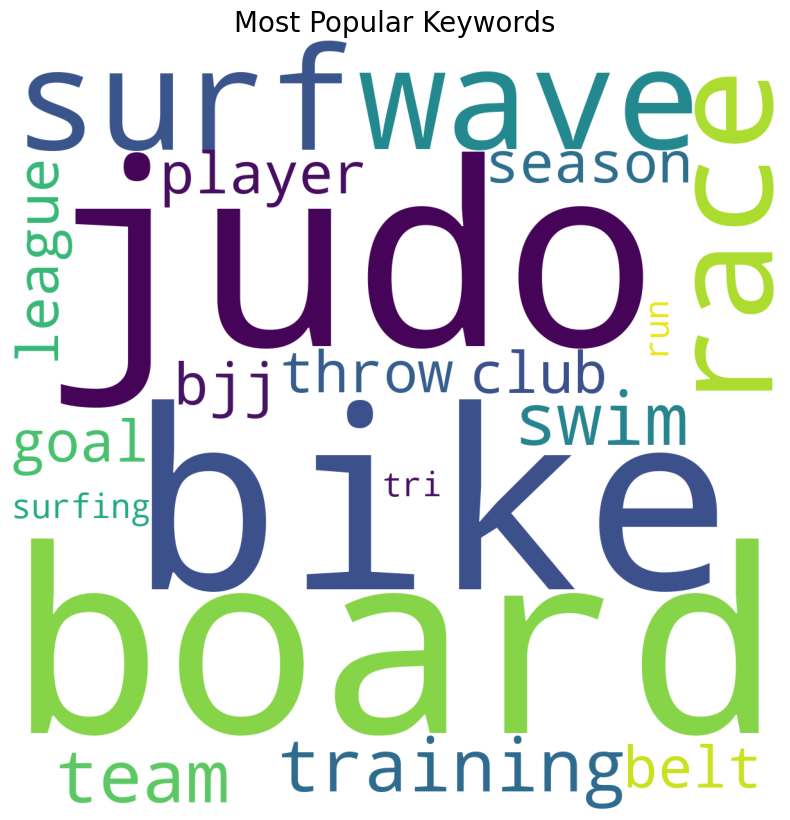

In [44]:
plt.rcParams['figure.figsize'] = (10, 10)
wordcloud = WordCloud(background_color='white', width=1200,
                      height=1200, max_words=20).generate(str(keywords_list.value_counts().head(20)))
plt.imshow(wordcloud)
plt.axis('off')
plt.title('Most Popular Keywords', fontsize=20)
plt.show()

In [45]:
keywords_list.value_counts()

board         243
judo          242
bike          210
surf          123
wave          119
             ... 
kanté           1
futbol          1
sociedad        1
marquinhos      1
sudden          1
Length: 4834, dtype: int64

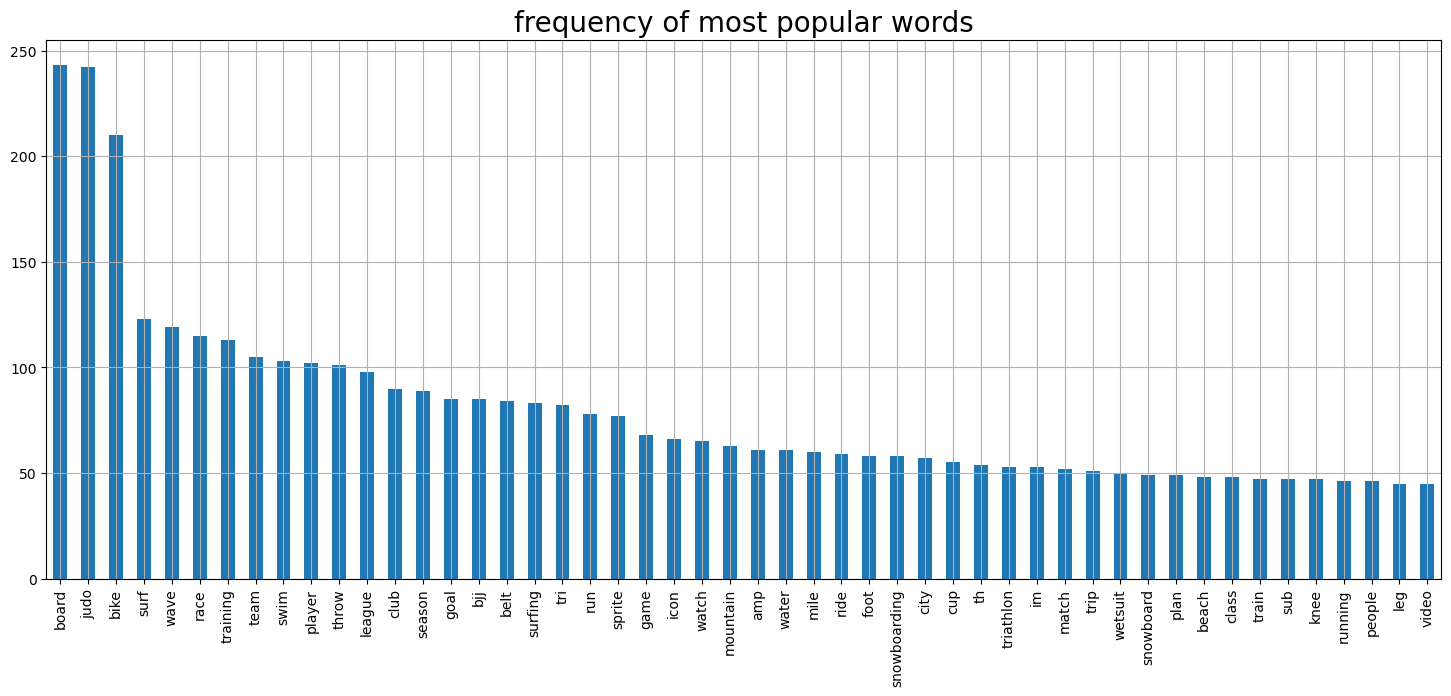

In [46]:
plt.figure(figsize=(18, 7))
keywords_list.value_counts().head(50).plot.bar()
plt.title('frequency of most popular words', fontsize=20)
plt.xticks(rotation=90)
plt.grid()
plt.show()

### 2.2.1 Preprocess the Data

In [47]:
trans = []
for i in range(0, 5000):
    trans.append([str(keywords_df.values[i, j]) for j in range(0, topn)])

# converting it into an numpy array
trans = np.array(trans)

# checking the shape of the array
print("Tranformed list Shape:")
print(trans.shape)

Tranformed list Shape:
(5000, 7)


In [48]:
print(trans)

[['fc' 'league' 'team' ... 'play' 'national' 'uefa']
 ['vail' 'beaver' 'creek' ... 'utah' 'whistler' 'resort']
 ['helmet' 'decide' 'aero' ... 'pro' 'deal' 'bar']
 ...
 ['cf' 'dropped' 'gd' ... 'fc' 'getafe' 'mönchengladbach']
 ['ci' 'forgiving' 'joe' ... 'average' 'board' 'stuff']
 ['computer' 'track' 'watch' ... 'discipline' 'wrist' 'wahoo']]


In [49]:
#Transforms the input dataset (a Python list of lists) into a one-hot encoded NumPy boolean array
te = TransactionEncoder()
data_encoded = te.fit_transform(trans)
data_encoded = pd.DataFrame(data_encoded, columns=te.columns_)

# getting the shape of the data
print("Data Encoded Shape:")
print(data_encoded.shape)

Data Encoded Shape:
(5000, 4835)


In [50]:
data_encoded

,None,ability,able,abroad,absolute,absolutely,ac,academy,accept,acceptable,...,zero,zidane,zika,zipp,zlatan,zone,zoot,ádám,álvaro,ángel
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4996,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4997,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4998,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


### 2.2.2 Generate Frequent Itemsets using Apriori Algorithm

In [51]:
#First, let us return the items and itemsets with at Least 0.5% support
frequent_itemsets=apriori(data_encoded, min_support = 0.005, use_colnames = True)
frequent_itemsets

,support,itemsets
0,0.0060,(advice)
1,0.0122,(amp)
2,0.0050,(bali)
3,0.0066,(ball)
4,0.0088,(bar)
...,...,...
139,0.0052,"(tri, bike)"
140,0.0118,"(judo, bjj)"
141,0.0066,"(sprite, icon)"
142,0.0056,"(sub, icon)"


In [52]:
frequent_itemsets[['support']].describe()

,support
count,144.000000
mean,0.009681
std,0.007055
min,0.005000
25%,0.005600
50%,0.007200
75%,0.010600
max,0.048600


### 2.2.3 Generate Association rules

##### Using Confidence Threshhold

In [53]:
#Using Confidence Threshhold
rules_c = association_rules(frequent_itemsets, metric="confidence", min_threshold=0.25)
rules_c

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,(run),(bike),0.0156,0.0420,0.0050,0.320513,7.631258,0.004345,1.409887,0.882731
1,(swim),(bike),0.0206,0.0420,0.0052,0.252427,6.010171,0.004335,1.281481,0.851149
2,(tri),(bike),0.0164,0.0420,0.0052,0.317073,7.549361,0.004511,1.402786,0.882003
3,(bjj),(judo),0.0170,0.0484,0.0118,0.694118,14.341274,0.010977,3.111000,0.946359
4,(sprite),(icon),0.0154,0.0132,0.0066,0.428571,32.467532,0.006397,1.726900,0.984359
5,(icon),(sprite),0.0132,0.0154,0.0066,0.500000,32.467532,0.006397,1.969200,0.982165
6,(sub),(icon),0.0094,0.0132,0.0056,0.595745,45.132173,0.005476,2.441032,0.987122
7,(icon),(sub),0.0132,0.0094,0.0056,0.424242,45.132173,0.005476,1.720516,0.990923
8,(youtube),(watch),0.0080,0.0130,0.0054,0.675000,51.923077,0.005296,3.036923,0.988650
9,(watch),(youtube),0.0130,0.0080,0.0054,0.415385,51.923077,0.005296,1.696842,0.993658


In [54]:
rules_c.sort_values('confidence', ascending = False, inplace = True)
rules_c.head(10)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
3,(bjj),(judo),0.0170,0.0484,0.0118,0.694118,14.341274,0.010977,3.111000,0.946359
8,(youtube),(watch),0.0080,0.0130,0.0054,0.675000,51.923077,0.005296,3.036923,0.988650
6,(sub),(icon),0.0094,0.0132,0.0056,0.595745,45.132173,0.005476,2.441032,0.987122
5,(icon),(sprite),0.0132,0.0154,0.0066,0.500000,32.467532,0.006397,1.969200,0.982165
4,(sprite),(icon),0.0154,0.0132,0.0066,0.428571,32.467532,0.006397,1.726900,0.984359
7,(icon),(sub),0.0132,0.0094,0.0056,0.424242,45.132173,0.005476,1.720516,0.990923
9,(watch),(youtube),0.0130,0.0080,0.0054,0.415385,51.923077,0.005296,1.696842,0.993658
0,(run),(bike),0.0156,0.0420,0.0050,0.320513,7.631258,0.004345,1.409887,0.882731
2,(tri),(bike),0.0164,0.0420,0.0052,0.317073,7.549361,0.004511,1.402786,0.882003
1,(swim),(bike),0.0206,0.0420,0.0052,0.252427,6.010171,0.004335,1.281481,0.851149


Axes(0.125,0.11;0.775x0.77)


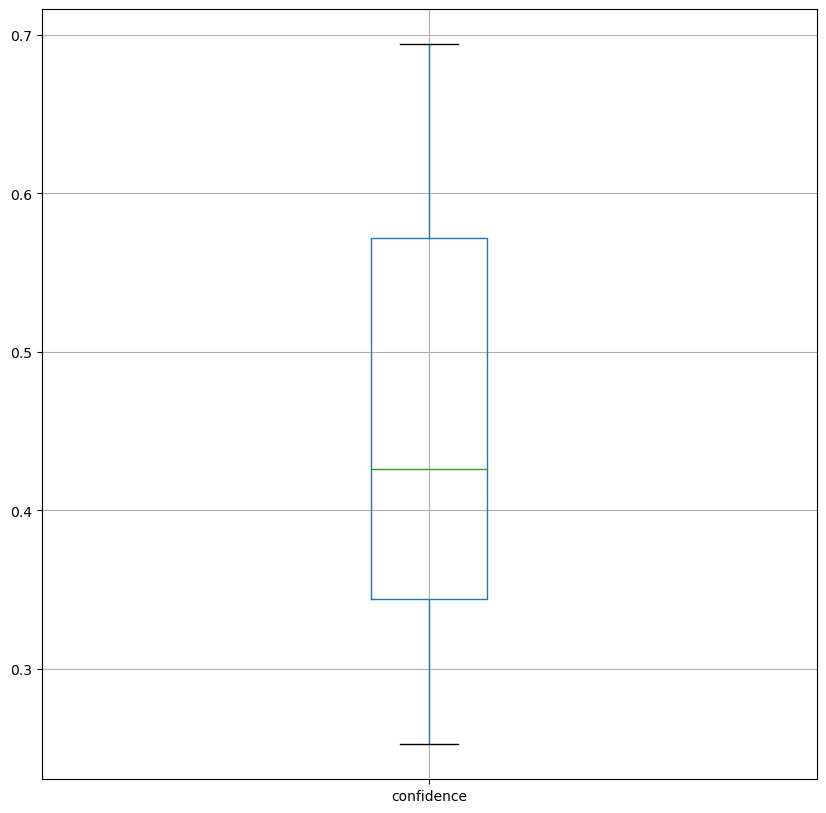

In [55]:
print(rules_c[['confidence']].boxplot())

In [56]:
rules_l = association_rules(frequent_itemsets, metric="lift", min_threshold=1)
rules_l

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,(run),(bike),0.0156,0.0420,0.0050,0.320513,7.631258,0.004345,1.409887,0.882731
1,(bike),(run),0.0420,0.0156,0.0050,0.119048,7.631258,0.004345,1.117427,0.907056
2,(bike),(swim),0.0420,0.0206,0.0052,0.123810,6.010171,0.004335,1.117793,0.870162
3,(swim),(bike),0.0206,0.0420,0.0052,0.252427,6.010171,0.004335,1.281481,0.851149
4,(tri),(bike),0.0164,0.0420,0.0052,0.317073,7.549361,0.004511,1.402786,0.882003
5,(bike),(tri),0.0420,0.0164,0.0052,0.123810,7.549361,0.004511,1.122587,0.905573
6,(judo),(bjj),0.0484,0.0170,0.0118,0.243802,14.341274,0.010977,1.299923,0.977586
7,(bjj),(judo),0.0170,0.0484,0.0118,0.694118,14.341274,0.010977,3.111000,0.946359
8,(sprite),(icon),0.0154,0.0132,0.0066,0.428571,32.467532,0.006397,1.726900,0.984359
9,(icon),(sprite),0.0132,0.0154,0.0066,0.500000,32.467532,0.006397,1.969200,0.982165


In [57]:
rules_l.sort_values('lift', ascending = False, inplace = True)
rules_l.head(10)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
12,(youtube),(watch),0.0080,0.0130,0.0054,0.675000,51.923077,0.005296,3.036923,0.988650
13,(watch),(youtube),0.0130,0.0080,0.0054,0.415385,51.923077,0.005296,1.696842,0.993658
10,(sub),(icon),0.0094,0.0132,0.0056,0.595745,45.132173,0.005476,2.441032,0.987122
11,(icon),(sub),0.0132,0.0094,0.0056,0.424242,45.132173,0.005476,1.720516,0.990923
8,(sprite),(icon),0.0154,0.0132,0.0066,0.428571,32.467532,0.006397,1.726900,0.984359
9,(icon),(sprite),0.0132,0.0154,0.0066,0.500000,32.467532,0.006397,1.969200,0.982165
7,(bjj),(judo),0.0170,0.0484,0.0118,0.694118,14.341274,0.010977,3.111000,0.946359
6,(judo),(bjj),0.0484,0.0170,0.0118,0.243802,14.341274,0.010977,1.299923,0.977586
0,(run),(bike),0.0156,0.0420,0.0050,0.320513,7.631258,0.004345,1.409887,0.882731
1,(bike),(run),0.0420,0.0156,0.0050,0.119048,7.631258,0.004345,1.117427,0.907056


Axes(0.125,0.11;0.775x0.77)


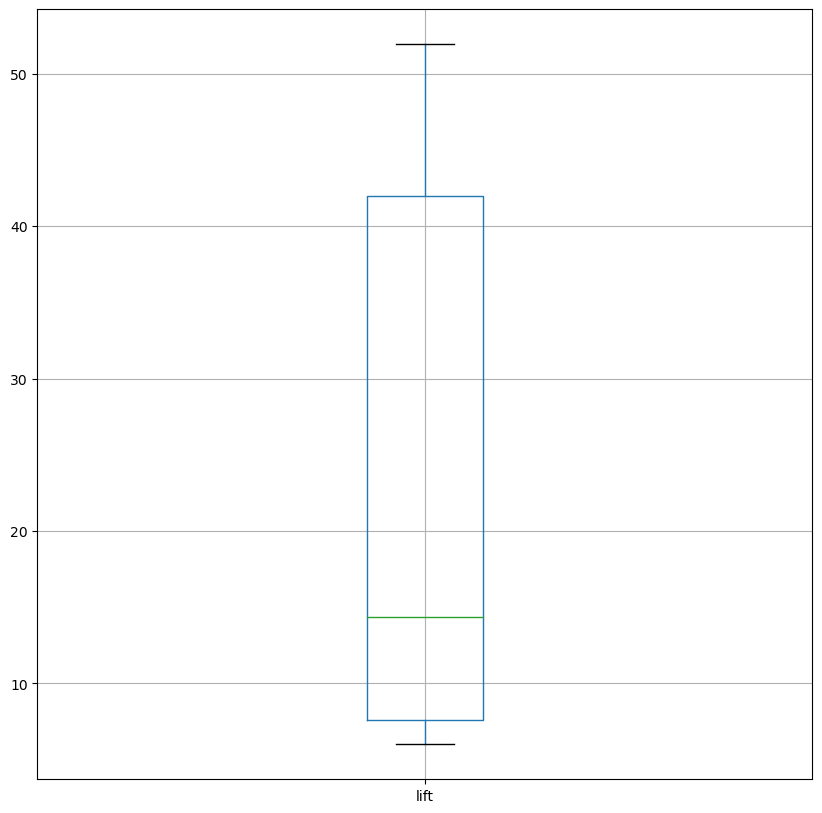

In [58]:
print(rules_l[['lift']].boxplot())

In [59]:
# Both thresholds
#Option A
rules_c[ (rules_c['lift'] >= 2) &
       (rules_c['confidence'] >= 0.3) ]

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
3,(bjj),(judo),0.0170,0.0484,0.0118,0.694118,14.341274,0.010977,3.111000,0.946359
8,(youtube),(watch),0.0080,0.0130,0.0054,0.675000,51.923077,0.005296,3.036923,0.988650
6,(sub),(icon),0.0094,0.0132,0.0056,0.595745,45.132173,0.005476,2.441032,0.987122
5,(icon),(sprite),0.0132,0.0154,0.0066,0.500000,32.467532,0.006397,1.969200,0.982165
4,(sprite),(icon),0.0154,0.0132,0.0066,0.428571,32.467532,0.006397,1.726900,0.984359
7,(icon),(sub),0.0132,0.0094,0.0056,0.424242,45.132173,0.005476,1.720516,0.990923
9,(watch),(youtube),0.0130,0.0080,0.0054,0.415385,51.923077,0.005296,1.696842,0.993658
0,(run),(bike),0.0156,0.0420,0.0050,0.320513,7.631258,0.004345,1.409887,0.882731
2,(tri),(bike),0.0164,0.0420,0.0052,0.317073,7.549361,0.004511,1.402786,0.882003


In [60]:
rules_l[ (rules_l['lift'] >= 2) &
       (rules_l['confidence'] >= 0.3) ]

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
12,(youtube),(watch),0.0080,0.0130,0.0054,0.675000,51.923077,0.005296,3.036923,0.988650
13,(watch),(youtube),0.0130,0.0080,0.0054,0.415385,51.923077,0.005296,1.696842,0.993658
10,(sub),(icon),0.0094,0.0132,0.0056,0.595745,45.132173,0.005476,2.441032,0.987122
11,(icon),(sub),0.0132,0.0094,0.0056,0.424242,45.132173,0.005476,1.720516,0.990923
8,(sprite),(icon),0.0154,0.0132,0.0066,0.428571,32.467532,0.006397,1.726900,0.984359
9,(icon),(sprite),0.0132,0.0154,0.0066,0.500000,32.467532,0.006397,1.969200,0.982165
7,(bjj),(judo),0.0170,0.0484,0.0118,0.694118,14.341274,0.010977,3.111000,0.946359
0,(run),(bike),0.0156,0.0420,0.0050,0.320513,7.631258,0.004345,1.409887,0.882731
4,(tri),(bike),0.0164,0.0420,0.0052,0.317073,7.549361,0.004511,1.402786,0.882003


### 2.2.3 Generate Association rules for each categories

### 2.2.3.1 Soccer

In [61]:
#Filter out all soccer keywords in the dataframe
soccer_data = data[data['category'] == 'soccer']
soccer_keywords_df = soccer_data.iloc[:, 9: ]
soccer_keywords_list = pd.Series([])
for col in soccer_keywords_df:
    soccer_keywords_list = soccer_keywords_list.append(soccer_keywords_df[col].dropna())

print(soccer_keywords_list)
print(soccer_keywords_list.shape)

0                    fc
3                career
9               country
13                  bar
27                match
             ...       
4979                 oh
4984               ball
4992            manager
4996         manchester
4997    mönchengladbach
Length: 6997, dtype: object
(6997,)


C:\Users\huang\AppData\Local\Temp\ipykernel_5260\223033109.py:4: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  soccer_keywords_list = pd.Series([])
C:\Users\huang\AppData\Local\Temp\ipykernel_5260\223033109.py:6: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  soccer_keywords_list = soccer_keywords_list.append(soccer_keywords_df[col].dropna())
C:\Users\huang\AppData\Local\Temp\ipykernel_5260\223033109.py:6: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  soccer_keywords_list = soccer_keywords_list.append(soccer_keywords_df[col].dropna())
C:\Users\huang\AppData\Local\Temp\ipykernel_5260\223033109.py:6: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future 

C:\Users\huang\anaconda3\Lib\site-packages\wordcloud\wordcloud.py:106: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  self.colormap = plt.cm.get_cmap(colormap)


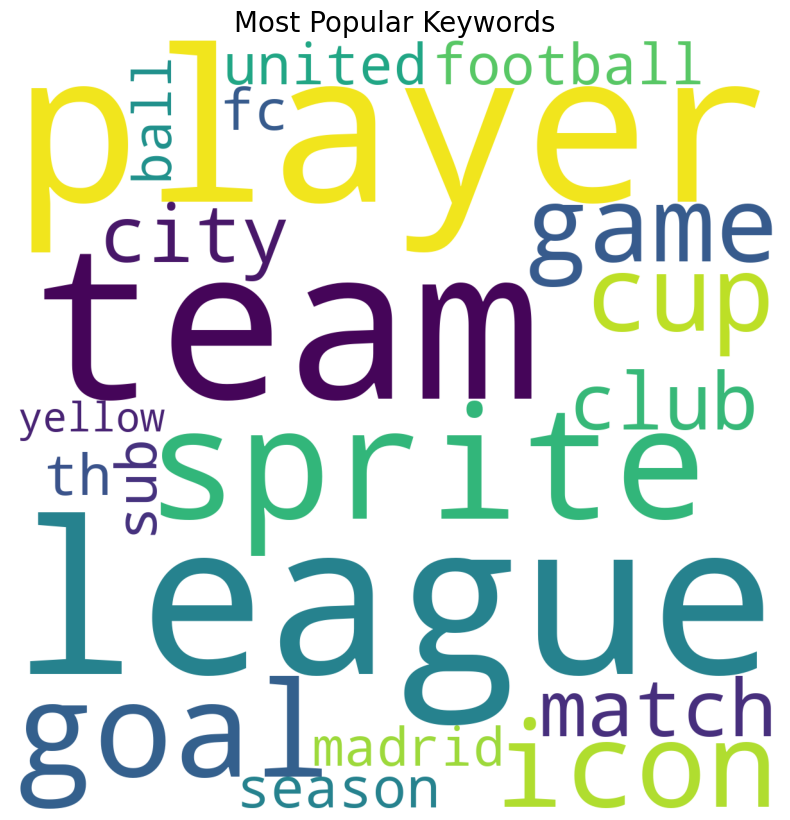

In [62]:
plt.rcParams['figure.figsize'] = (10, 10)
wordcloud = WordCloud(background_color='white', width=1200,
                      height=1200, max_words=20).generate(str(soccer_keywords_list.value_counts().head(20)))
plt.imshow(wordcloud)
plt.axis('off')
plt.title('Most Popular Keywords', fontsize=20)
plt.show()

In [63]:
print(soccer_keywords_list.value_counts())

league     98
team       97
player     96
sprite     77
goal       76
           ..
allowed     1
hanging     1
john        1
par         1
oh          1
Length: 2386, dtype: int64


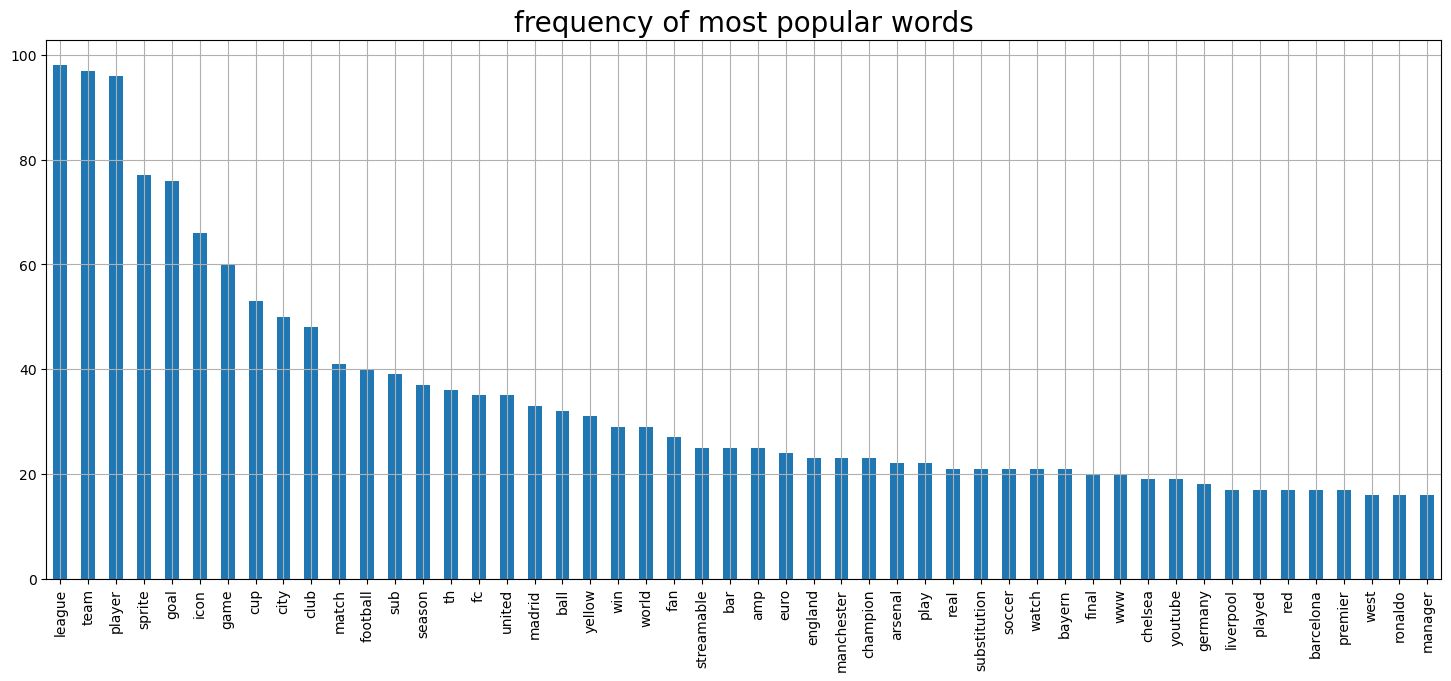

In [64]:
plt.figure(figsize=(18, 7))
soccer_keywords_list.value_counts().head(50).plot.bar()
plt.title('frequency of most popular words', fontsize=20)
plt.xticks(rotation=90)
plt.grid()
plt.show()

### 2.2.3.1.1  Preprocess the Data

In [65]:
soccer_keyword = []
for i in range(0, 1000):
    soccer_keyword.append([str(soccer_keywords_df.values[i, j]) for j in range(0, topn)])

soccer_keyword = np.array(soccer_keyword)
print("Tranformed list Shape:")
print(soccer_keyword.shape)

soccer_te = TransactionEncoder()
soccer_keyword_encoded = soccer_te.fit_transform(soccer_keyword)
soccer_keyword_encoded = pd.DataFrame(soccer_keyword_encoded, columns = soccer_te.columns_)

# getting the shape of the data
print("Data Encoded Shape:")
print(soccer_keyword_encoded.shape)

Tranformed list Shape:
(1000, 7)
Data Encoded Shape:
(1000, 2387)


### 2.2.3.1.2 Generate frequent itemsets using Apriori algorithm for Soccer

In [66]:
soccer_frequent_keyword=apriori(soccer_keyword_encoded, min_support = 0.01, use_colnames = True)
soccer_frequent_keyword

,support,itemsets
0,0.025,(amp)
1,0.022,(arsenal)
2,0.032,(ball)
3,0.025,(bar)
4,0.017,(barcelona)
...,...,...
127,0.011,"(sprite, ball, icon)"
128,0.010,"(sprite, bar, icon)"
129,0.015,"(sub, icon, substitution)"
130,0.016,"(sub, yellow, icon)"


In [67]:
soccer_frequent_keyword[['support']].describe()

,support
count,132.000000
mean,0.021136
std,0.017178
min,0.010000
25%,0.011000
50%,0.015000
75%,0.022250
max,0.098000


### 2.2.3.1.3 Generate Association Rules for Soccer

In [68]:
rules_c_soccer = association_rules(soccer_frequent_keyword, metric="confidence", min_threshold=0.65)
rules_c_soccer.sort_values('confidence', ascending = False, inplace = True)
rules_c_soccer

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
10,"(sprite, ball)",(icon),0.011,0.066,0.011,1.000000,15.151515,0.010274,inf,0.944388
12,"(sub, substitution)",(icon),0.015,0.066,0.015,1.000000,15.151515,0.014010,inf,0.948223
18,"(www, youtube)",(watch),0.010,0.021,0.010,1.000000,47.619048,0.009790,inf,0.988889
19,"(www, watch)",(youtube),0.010,0.019,0.010,1.000000,52.631579,0.009810,inf,0.990909
15,"(sub, yellow)",(icon),0.017,0.066,0.016,0.941176,14.260250,0.014878,15.878000,0.945956
13,"(icon, substitution)",(sub),0.017,0.039,0.015,0.882353,22.624434,0.014337,8.168500,0.972330
0,(nbsp),(amp),0.012,0.025,0.010,0.833333,33.333333,0.009700,5.850000,0.981781
4,(substitution),(icon),0.021,0.066,0.017,0.809524,12.265512,0.015614,4.903500,0.938172
8,(youtube),(watch),0.019,0.021,0.015,0.789474,37.593985,0.014601,4.650250,0.992253
5,(yellow),(icon),0.031,0.066,0.024,0.774194,11.730205,0.021954,4.136286,0.944014


<Axes: >

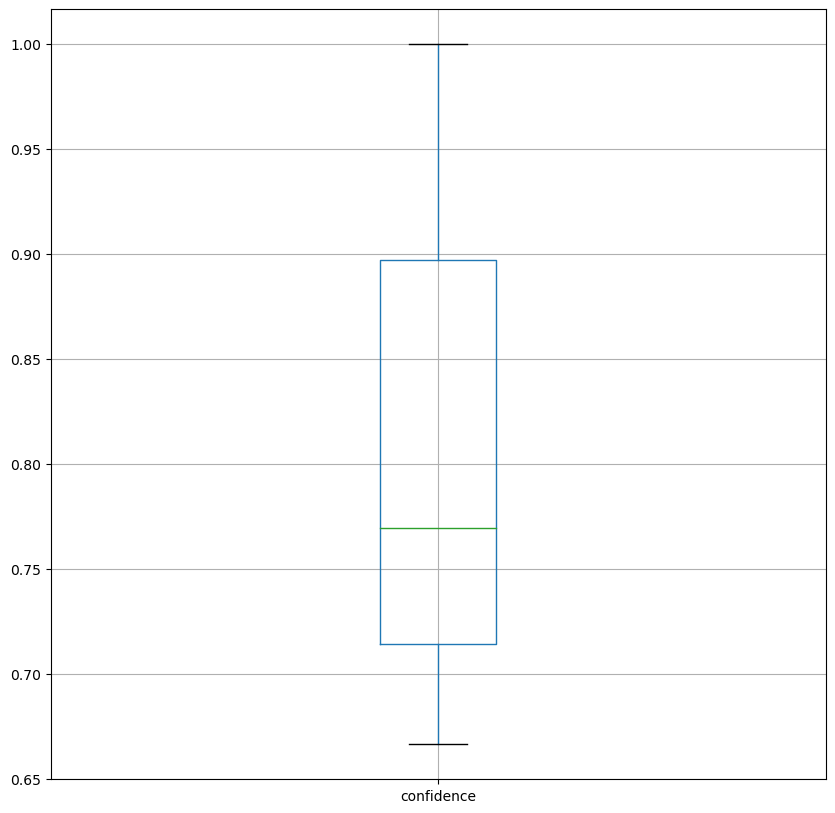

In [69]:
rules_c_soccer[['confidence']].boxplot()

In [70]:
rules_l_soccer = association_rules(soccer_frequent_keyword, metric="lift", min_threshold=14)
rules_l_soccer.sort_values('lift', ascending = False, inplace = True)
rules_l_soccer

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
34,"(www, watch)",(youtube),0.010,0.019,0.010,1.000000,52.631579,0.009810,inf,0.990909
35,(youtube),"(www, watch)",0.019,0.010,0.010,0.526316,52.631579,0.009810,2.090000,1.000000
36,(watch),"(www, youtube)",0.021,0.010,0.010,0.476190,47.619048,0.009790,1.890000,1.000000
33,"(www, youtube)",(watch),0.010,0.021,0.010,1.000000,47.619048,0.009790,inf,0.988889
14,(youtube),(watch),0.019,0.021,0.015,0.789474,37.593985,0.014601,4.650250,0.992253
15,(watch),(youtube),0.021,0.019,0.015,0.714286,37.593985,0.014601,3.433500,0.994280
0,(nbsp),(amp),0.012,0.025,0.010,0.833333,33.333333,0.009700,5.850000,0.981781
32,"(youtube, watch)",(www),0.015,0.020,0.010,0.666667,33.333333,0.009700,2.940000,0.984772
37,(www),"(youtube, watch)",0.020,0.015,0.010,0.500000,33.333333,0.009700,1.970000,0.989796
1,(amp),(nbsp),0.025,0.012,0.010,0.400000,33.333333,0.009700,1.646667,0.994872


<Axes: >

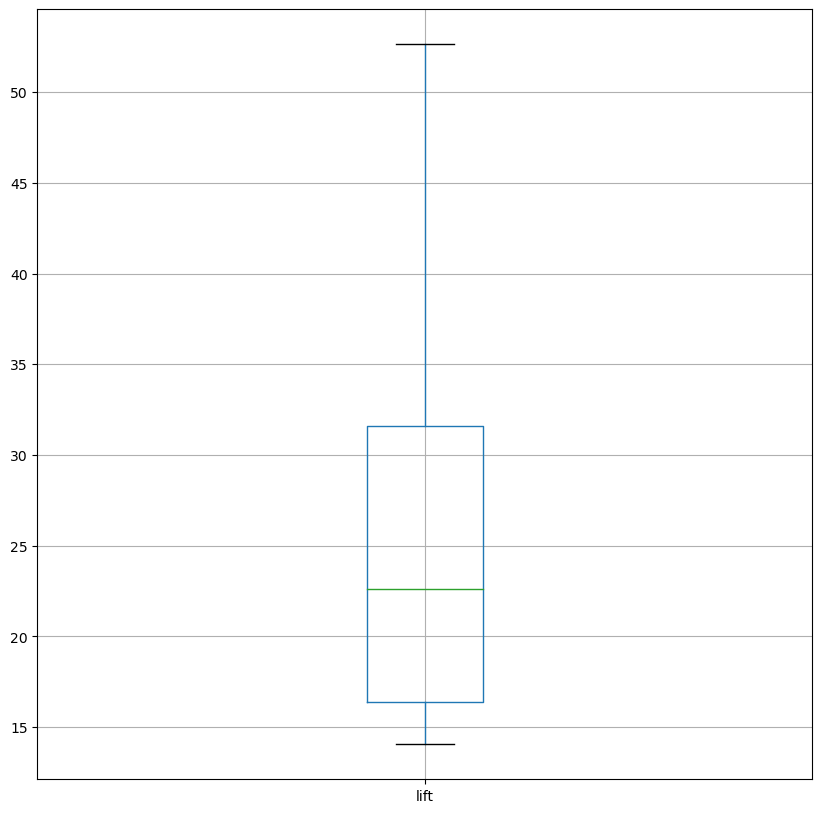

In [71]:
rules_l_soccer[['lift']].boxplot()

In [72]:
# Both thresholds
# Option A
rules_c_soccer[ (rules_c_soccer['lift'] >= 15) &
       (rules_c_soccer['confidence'] >= 0.70) ]

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
10,"(sprite, ball)",(icon),0.011,0.066,0.011,1.000000,15.151515,0.010274,inf,0.944388
12,"(sub, substitution)",(icon),0.015,0.066,0.015,1.000000,15.151515,0.014010,inf,0.948223
18,"(www, youtube)",(watch),0.010,0.021,0.010,1.000000,47.619048,0.009790,inf,0.988889
19,"(www, watch)",(youtube),0.010,0.019,0.010,1.000000,52.631579,0.009810,inf,0.990909
13,"(icon, substitution)",(sub),0.017,0.039,0.015,0.882353,22.624434,0.014337,8.16850,0.972330
0,(nbsp),(amp),0.012,0.025,0.010,0.833333,33.333333,0.009700,5.85000,0.981781
8,(youtube),(watch),0.019,0.021,0.015,0.789474,37.593985,0.014601,4.65025,0.992253
7,(substitution),(sub),0.021,0.039,0.015,0.714286,18.315018,0.014181,3.36350,0.965679
9,(watch),(youtube),0.021,0.019,0.015,0.714286,37.593985,0.014601,3.43350,0.994280
14,(substitution),"(sub, icon)",0.021,0.028,0.015,0.714286,25.510204,0.014412,3.40200,0.981410


In [73]:
soccer_frequent_keyword=apriori(soccer_keyword_encoded, min_support = 0.01, use_colnames = True)
rules_c_soccer = association_rules(soccer_frequent_keyword, metric="confidence", min_threshold=0.65)
rules_c_soccer[ (rules_c_soccer['lift'] >= 15) &
       (rules_c_soccer['confidence'] >= 0.70) ]

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,(nbsp),(amp),0.012,0.025,0.010,0.833333,33.333333,0.009700,5.85000,0.981781
7,(substitution),(sub),0.021,0.039,0.015,0.714286,18.315018,0.014181,3.36350,0.965679
8,(youtube),(watch),0.019,0.021,0.015,0.789474,37.593985,0.014601,4.65025,0.992253
9,(watch),(youtube),0.021,0.019,0.015,0.714286,37.593985,0.014601,3.43350,0.994280
10,"(sprite, ball)",(icon),0.011,0.066,0.011,1.000000,15.151515,0.010274,inf,0.944388
12,"(sub, substitution)",(icon),0.015,0.066,0.015,1.000000,15.151515,0.014010,inf,0.948223
13,"(icon, substitution)",(sub),0.017,0.039,0.015,0.882353,22.624434,0.014337,8.16850,0.972330
14,(substitution),"(sub, icon)",0.021,0.028,0.015,0.714286,25.510204,0.014412,3.40200,0.981410
18,"(www, youtube)",(watch),0.010,0.021,0.010,1.000000,47.619048,0.009790,inf,0.988889
19,"(www, watch)",(youtube),0.010,0.019,0.010,1.000000,52.631579,0.009810,inf,0.990909


### 2.2.3.2 Snowboarding

In [74]:
#Filter out all snowboarding keywords in the dataframe
snowboarding_data = data[data['category'] == 'snowboarding']
snowboarding_keywords_df = snowboarding_data.iloc[:, 9: ]
snowboarding_keywords_list = pd.Series([])
for col in snowboarding_keywords_df:
    snowboarding_keywords_list = snowboarding_keywords_list.append(snowboarding_keywords_df[col].dropna())

print(snowboarding_keywords_list)
print(snowboarding_keywords_list.shape)

1            vail
7       northstar
12         lesson
14           heli
15           blue
          ...    
4969        timer
4972         road
4974     location
4980      toeside
4985       slowly
Length: 7000, dtype: object
(7000,)


C:\Users\huang\AppData\Local\Temp\ipykernel_5260\1122365515.py:4: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  snowboarding_keywords_list = pd.Series([])
C:\Users\huang\AppData\Local\Temp\ipykernel_5260\1122365515.py:6: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  snowboarding_keywords_list = snowboarding_keywords_list.append(snowboarding_keywords_df[col].dropna())
C:\Users\huang\AppData\Local\Temp\ipykernel_5260\1122365515.py:6: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  snowboarding_keywords_list = snowboarding_keywords_list.append(snowboarding_keywords_df[col].dropna())
C:\Users\huang\AppData\Local\Temp\ipykernel_5260\1122365515.py:6: FutureWarning: The series.append method is deprecate

C:\Users\huang\anaconda3\Lib\site-packages\wordcloud\wordcloud.py:106: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  self.colormap = plt.cm.get_cmap(colormap)


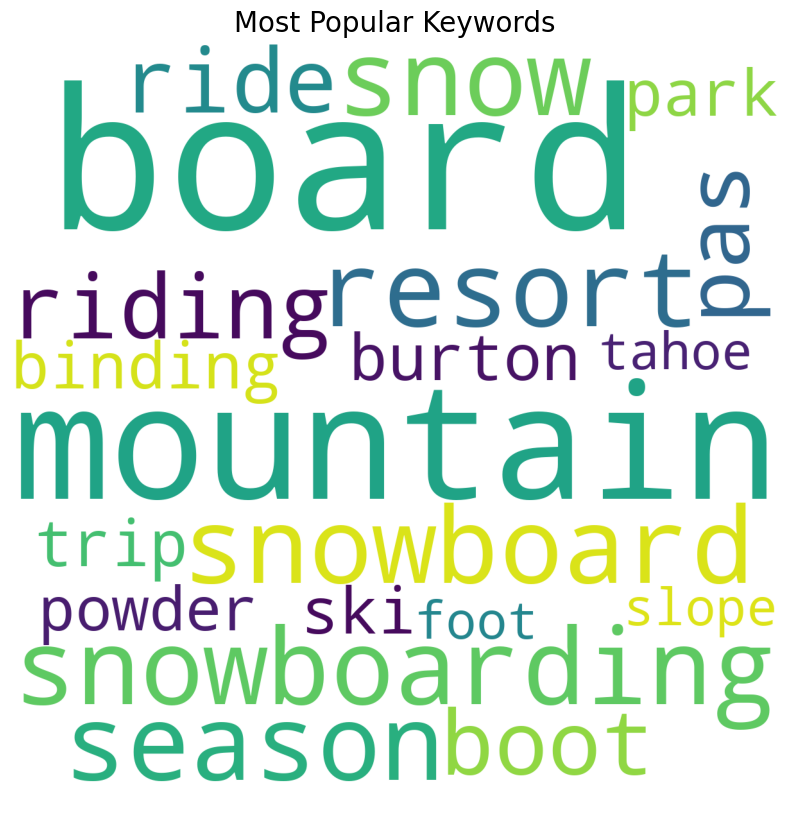

In [75]:
plt.rcParams['figure.figsize'] = (10, 10)
wordcloud = WordCloud(background_color='white', width=1200,
                      height=1200, max_words=20).generate(str(snowboarding_keywords_list.value_counts().head(20)))
plt.imshow(wordcloud)
plt.axis('off')
plt.title('Most Popular Keywords', fontsize=20)
plt.show()

In [76]:
print(snowboarding_keywords_list.value_counts())

board           99
mountain        62
snowboarding    58
snowboard       49
season          45
                ..
vague            1
strong           1
mouth            1
backwards        1
slowly           1
Length: 2487, dtype: int64


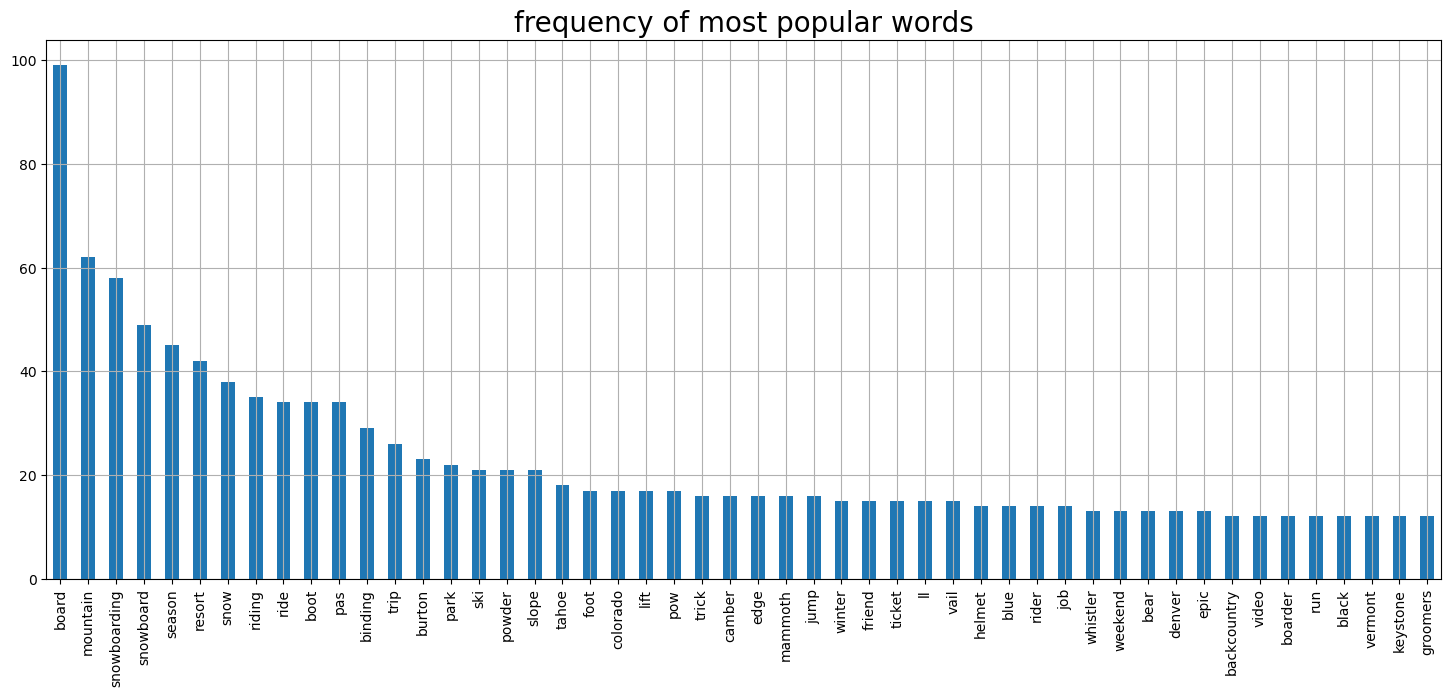

In [77]:
plt.figure(figsize=(18, 7))
snowboarding_keywords_list.value_counts().head(50).plot.bar()
plt.title('frequency of most popular words', fontsize=20)
plt.xticks(rotation=90)
plt.grid()
plt.show()

### 2.2.3.2.1  Preprocess the Data

In [78]:
snowboarding_keyword = []
for i in range(0, 1000):
    snowboarding_keyword.append([str(snowboarding_keywords_df.values[i, j]) for j in range(0, topn)])

snowboarding_keyword = np.array(snowboarding_keyword)
print("Tranformed list Shape:")
print(snowboarding_keyword.shape)

snowboarding_te = TransactionEncoder()
snowboarding_keyword_encoded = snowboarding_te.fit_transform(snowboarding_keyword)
snowboarding_keyword_encoded = pd.DataFrame(snowboarding_keyword_encoded, columns = snowboarding_te.columns_)

# getting the shape of the data
print("Data Encoded Shape:")
print(snowboarding_keyword_encoded.shape)

Tranformed list Shape:
(1000, 7)
Data Encoded Shape:
(1000, 2487)


### 2.2.3.2.2 Generate frequent itemsets using Apriori algorithm for Snowboarding

In [79]:
snowboarding_frequent_keyword=apriori(snowboarding_keyword_encoded, min_support = 0.006, use_colnames = True)
snowboarding_frequent_keyword

,support,itemsets
0,0.008,(accommodation)
1,0.010,(advice)
2,0.010,(air)
3,0.006,(airport)
4,0.008,(alp)
...,...,...
258,0.006,"(season, mountain)"
259,0.006,"(snow, mountain)"
260,0.006,"(resort, pas)"
261,0.007,"(season, pas)"


In [80]:
snowboarding_frequent_keyword[['support']].describe()

,support
count,263.000000
mean,0.010456
std,0.009489
min,0.006000
25%,0.006000
50%,0.008000
75%,0.010000
max,0.099000


### 2.2.3.2.3 Generate Association Rules for Snowboarding

In [81]:
rules_c_snowboarding = association_rules(snowboarding_frequent_keyword, metric="confidence", min_threshold=0.3)
rules_c_snowboarding.sort_values('confidence', ascending = False, inplace = True)
rules_c_snowboarding

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
9,(mont),(tremblant),0.006,0.008,0.006,1.000000,125.000000,0.005952,inf,0.997988
10,(tremblant),(mont),0.008,0.006,0.006,0.750000,125.000000,0.005952,3.976000,1.000000
4,(camber),(board),0.016,0.099,0.010,0.625000,6.313131,0.008416,2.402667,0.855285
1,(bear),(mammoth),0.013,0.016,0.008,0.615385,38.461538,0.007792,2.558400,0.986829
2,(bought),(board),0.010,0.099,0.006,0.600000,6.060606,0.005010,2.252500,0.843434
5,(rocker),(board),0.010,0.099,0.006,0.600000,6.060606,0.005010,2.252500,0.843434
6,(rocker),(camber),0.010,0.016,0.006,0.600000,37.500000,0.005840,2.460000,0.983165
8,(epic),(pas),0.013,0.034,0.007,0.538462,15.837104,0.006558,2.093000,0.949197
0,(mammoth),(bear),0.016,0.013,0.008,0.500000,38.461538,0.007792,1.974000,0.989837
7,(camber),(rocker),0.016,0.010,0.006,0.375000,37.500000,0.005840,1.584000,0.989160


<Axes: >

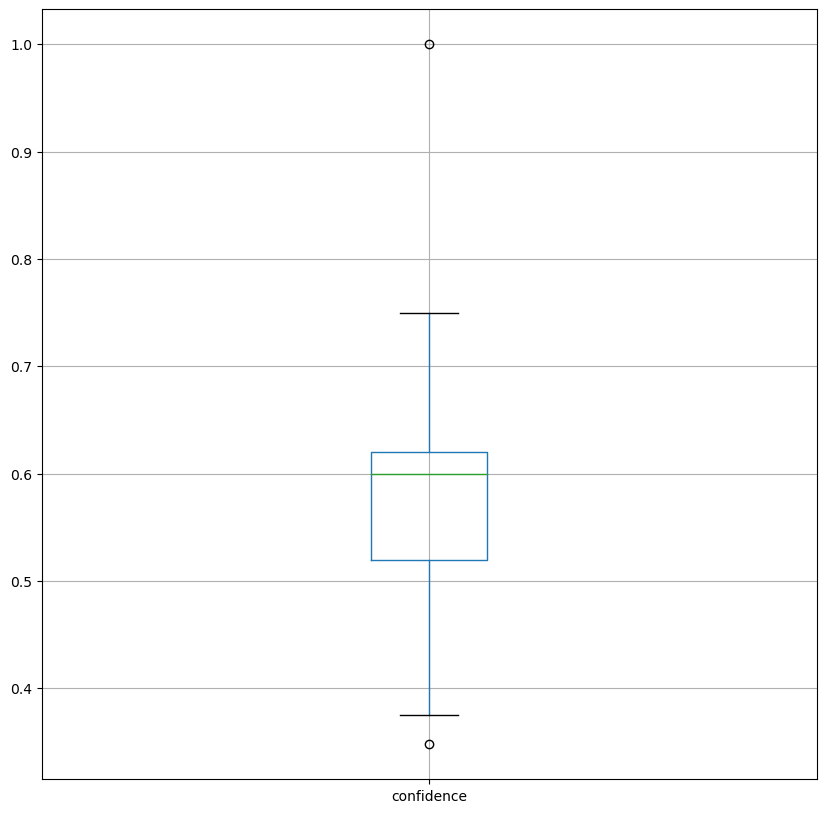

In [82]:
rules_c_snowboarding[['confidence']].boxplot()

In [83]:
rules_l_snowboarding = association_rules(snowboarding_frequent_keyword, metric="lift", min_threshold=5)
rules_l_snowboarding.sort_values('lift', ascending = False, inplace = True)
rules_l_snowboarding

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
14,(mont),(tremblant),0.006,0.008,0.006,1.000000,125.000000,0.005952,inf,0.997988
15,(tremblant),(mont),0.008,0.006,0.006,0.750000,125.000000,0.005952,3.976000,1.000000
0,(mammoth),(bear),0.016,0.013,0.008,0.500000,38.461538,0.007792,1.974000,0.989837
1,(bear),(mammoth),0.013,0.016,0.008,0.615385,38.461538,0.007792,2.558400,0.986829
10,(rocker),(camber),0.010,0.016,0.006,0.600000,37.500000,0.005840,2.460000,0.983165
11,(camber),(rocker),0.016,0.010,0.006,0.375000,37.500000,0.005840,1.584000,0.989160
12,(epic),(pas),0.013,0.034,0.007,0.538462,15.837104,0.006558,2.093000,0.949197
13,(pas),(epic),0.034,0.013,0.007,0.205882,15.837104,0.006558,1.242889,0.969831
6,(board),(camber),0.099,0.016,0.010,0.101010,6.313131,0.008416,1.094562,0.934073
7,(camber),(board),0.016,0.099,0.010,0.625000,6.313131,0.008416,2.402667,0.855285


<Axes: >

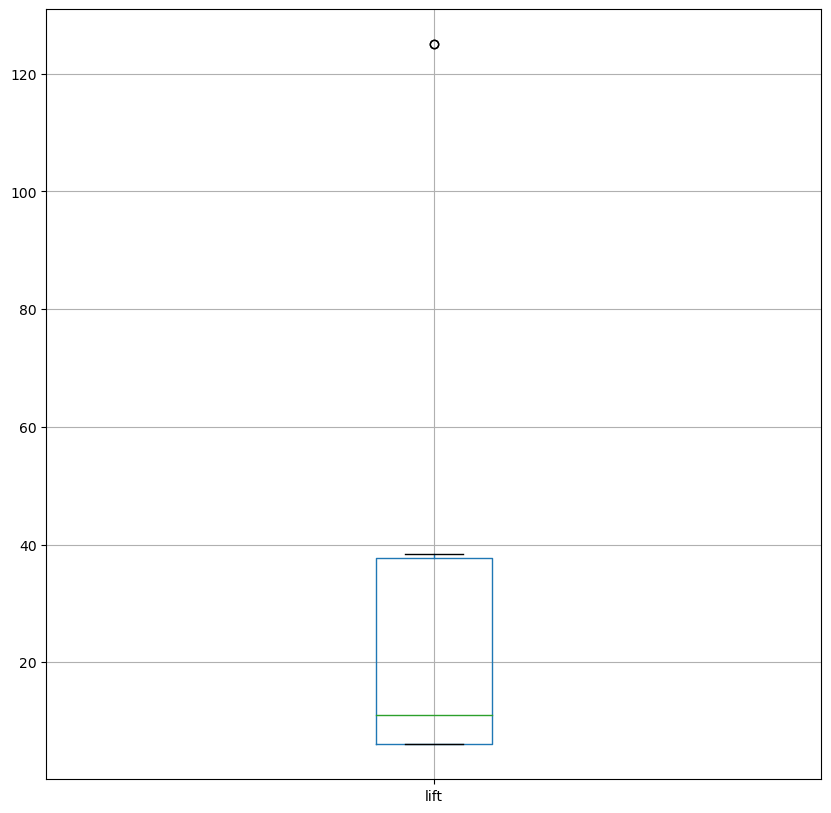

In [84]:
rules_l_snowboarding[['lift']].boxplot()

In [85]:
# Both thresholds
# Option A
rules_c_snowboarding[ (rules_c_snowboarding['lift'] >= 6) &
       (rules_c_snowboarding['confidence'] >= 0.35) ]

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
9,(mont),(tremblant),0.006,0.008,0.006,1.000000,125.000000,0.005952,inf,0.997988
10,(tremblant),(mont),0.008,0.006,0.006,0.750000,125.000000,0.005952,3.976000,1.000000
4,(camber),(board),0.016,0.099,0.010,0.625000,6.313131,0.008416,2.402667,0.855285
1,(bear),(mammoth),0.013,0.016,0.008,0.615385,38.461538,0.007792,2.558400,0.986829
2,(bought),(board),0.010,0.099,0.006,0.600000,6.060606,0.005010,2.252500,0.843434
5,(rocker),(board),0.010,0.099,0.006,0.600000,6.060606,0.005010,2.252500,0.843434
6,(rocker),(camber),0.010,0.016,0.006,0.600000,37.500000,0.005840,2.460000,0.983165
8,(epic),(pas),0.013,0.034,0.007,0.538462,15.837104,0.006558,2.093000,0.949197
0,(mammoth),(bear),0.016,0.013,0.008,0.500000,38.461538,0.007792,1.974000,0.989837
7,(camber),(rocker),0.016,0.010,0.006,0.375000,37.500000,0.005840,1.584000,0.989160


In [86]:
snowboarding_frequent_keyword=apriori(snowboarding_keyword_encoded, min_support = 0.006, use_colnames = True)
rules_c_snowboarding = association_rules(snowboarding_frequent_keyword, metric="confidence", min_threshold=0.3)
rules_c_snowboarding[ (rules_c_snowboarding['lift'] >= 6) &
       (rules_c_snowboarding['confidence'] >= 0.35) ]

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,(mammoth),(bear),0.016,0.013,0.008,0.500000,38.461538,0.007792,1.974000,0.989837
1,(bear),(mammoth),0.013,0.016,0.008,0.615385,38.461538,0.007792,2.558400,0.986829
2,(bought),(board),0.010,0.099,0.006,0.600000,6.060606,0.005010,2.252500,0.843434
4,(camber),(board),0.016,0.099,0.010,0.625000,6.313131,0.008416,2.402667,0.855285
5,(rocker),(board),0.010,0.099,0.006,0.600000,6.060606,0.005010,2.252500,0.843434
6,(rocker),(camber),0.010,0.016,0.006,0.600000,37.500000,0.005840,2.460000,0.983165
7,(camber),(rocker),0.016,0.010,0.006,0.375000,37.500000,0.005840,1.584000,0.989160
8,(epic),(pas),0.013,0.034,0.007,0.538462,15.837104,0.006558,2.093000,0.949197
9,(mont),(tremblant),0.006,0.008,0.006,1.000000,125.000000,0.005952,inf,0.997988
10,(tremblant),(mont),0.008,0.006,0.006,0.750000,125.000000,0.005952,3.976000,1.000000


### 2.2.3.3 Triathlon

In [87]:
#Filter out all triathlon keywords in the dataframe
triathlon_data = data[data['category'] == 'triathlon']
triathlon_keywords_df = triathlon_data.iloc[:, 9: ]
triathlon_keywords_list = pd.Series([])
for col in triathlon_keywords_df:
    triathlon_keywords_list = triathlon_keywords_list.append(triathlon_keywords_df[col].dropna())

print(triathlon_keywords_list)
print(triathlon_keywords_list.shape)

2         helmet
10         water
24          trek
31            xt
49       monthly
          ...   
4987      recent
4988    maryland
4990         age
4994        bike
4999       wahoo
Length: 7000, dtype: object
(7000,)


C:\Users\huang\AppData\Local\Temp\ipykernel_5260\1858714747.py:4: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  triathlon_keywords_list = pd.Series([])
C:\Users\huang\AppData\Local\Temp\ipykernel_5260\1858714747.py:6: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  triathlon_keywords_list = triathlon_keywords_list.append(triathlon_keywords_df[col].dropna())
C:\Users\huang\AppData\Local\Temp\ipykernel_5260\1858714747.py:6: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  triathlon_keywords_list = triathlon_keywords_list.append(triathlon_keywords_df[col].dropna())
C:\Users\huang\AppData\Local\Temp\ipykernel_5260\1858714747.py:6: FutureWarning: The series.append method is deprecated and will be removed

C:\Users\huang\anaconda3\Lib\site-packages\wordcloud\wordcloud.py:106: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  self.colormap = plt.cm.get_cmap(colormap)


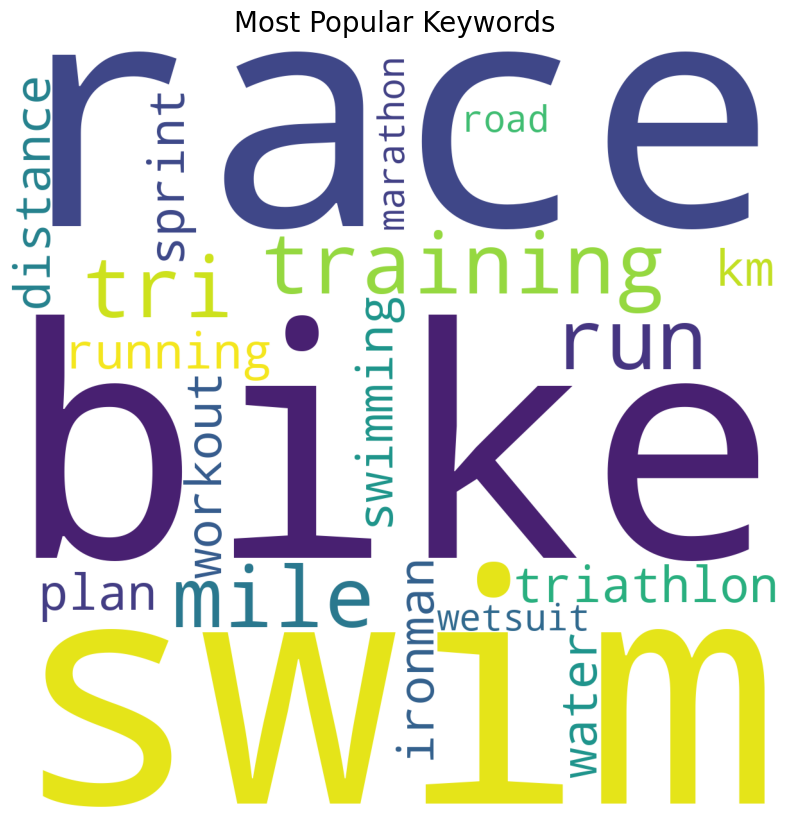

In [88]:
plt.rcParams['figure.figsize'] = (10, 10)
wordcloud = WordCloud(background_color='white', width=1200,
                      height=1200, max_words=20).generate(str(triathlon_keywords_list.value_counts().head(20)))
plt.imshow(wordcloud)
plt.axis('off')
plt.title('Most Popular Keywords', fontsize=20)
plt.show()

In [89]:
print(triathlon_keywords_list.value_counts())

bike         209
race         115
swim         101
training      91
tri           82
            ... 
saving         1
hamstring      1
night          1
lt             1
age            1
Length: 2317, dtype: int64


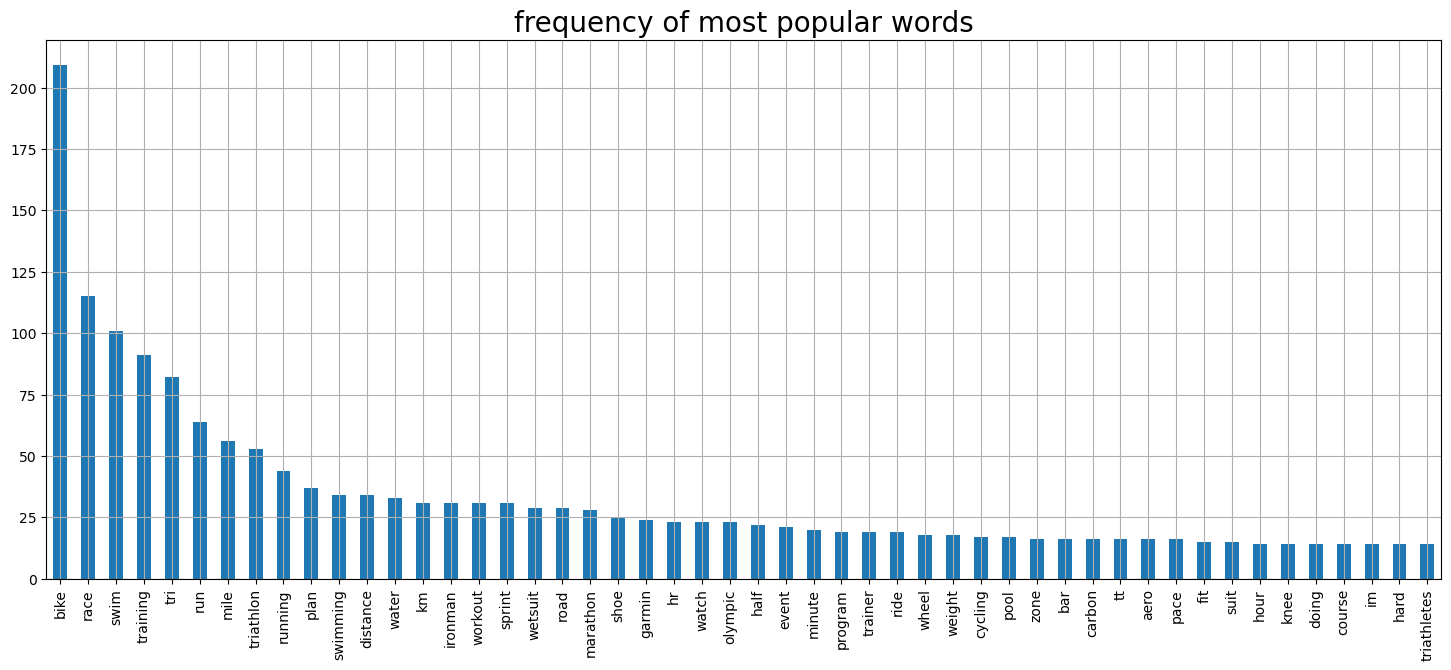

In [90]:
plt.figure(figsize=(18, 7))
triathlon_keywords_list.value_counts().head(50).plot.bar()
plt.title('frequency of most popular words', fontsize=20)
plt.xticks(rotation=90)
plt.grid()
plt.show()

### 2.2.3.3.1  Preprocess the Data

In [91]:
triathlon_keyword = []
for i in range(0, 1000):
    triathlon_keyword.append([str(triathlon_keywords_df.values[i, j]) for j in range(0, topn)])

triathlon_keyword = np.array(triathlon_keyword)
print("Tranformed list Shape:")
print(triathlon_keyword.shape)

triathlon_te = TransactionEncoder()
triathlon_keyword_encoded = triathlon_te.fit_transform(triathlon_keyword)
triathlon_keyword_encoded = pd.DataFrame(triathlon_keyword_encoded, columns = triathlon_te.columns_)

# getting the shape of the data
print("Data Encoded Shape:")
print(triathlon_keyword_encoded.shape)

Tranformed list Shape:
(1000, 7)
Data Encoded Shape:
(1000, 2317)


### 2.2.3.3.2 Generate frequent itemsets using Apriori algorithm for Triathlon

In [92]:
triathlon_frequent_keyword=apriori(triathlon_keyword_encoded, min_support = 0.009, use_colnames = True)
triathlon_frequent_keyword

,support,itemsets
0,0.009,(activity)
1,0.009,(advice)
2,0.016,(aero)
3,0.010,(amp)
4,0.016,(bar)
...,...,...
116,0.014,"(swimming, swim)"
117,0.009,"(tri, swim)"
118,0.014,"(water, swim)"
119,0.011,"(training, triathlon)"


In [93]:
triathlon_frequent_keyword[['support']].describe()

,support
count,121.000000
mean,0.021041
std,0.024597
min,0.009000
25%,0.011000
50%,0.014000
75%,0.021000
max,0.209000


### 2.2.3.3.3 Generate Association Rules for Triathlon

In [94]:
rules_c_triathlon = association_rules(triathlon_frequent_keyword, metric="confidence", min_threshold=0.25)
rules_c_triathlon.sort_values('confidence', ascending = False, inplace = True)
rules_c_triathlon

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
4,(road),(bike),0.029,0.209,0.022,0.758621,3.629764,0.015939,3.277000,0.746138
18,"(run, swim)",(bike),0.017,0.209,0.012,0.705882,3.377428,0.008447,2.689400,0.716090
8,(tt),(bike),0.016,0.209,0.011,0.687500,3.289474,0.007656,2.531200,0.707317
14,(suit),(tri),0.015,0.082,0.009,0.600000,7.317073,0.007770,2.295000,0.876481
1,(fit),(bike),0.015,0.209,0.009,0.600000,2.870813,0.005865,1.977500,0.661591
0,(aero),(bike),0.016,0.209,0.009,0.562500,2.691388,0.005656,1.808000,0.638663
17,"(run, bike)",(swim),0.025,0.101,0.012,0.480000,4.752475,0.009475,1.728846,0.809829
19,"(bike, swim)",(run),0.026,0.064,0.012,0.461538,7.211538,0.010336,1.738286,0.884326
11,(plan),(training),0.037,0.091,0.016,0.432432,4.752005,0.012633,1.601571,0.819899
16,(water),(swim),0.033,0.101,0.014,0.424242,4.200420,0.010667,1.561421,0.787930


<Axes: >

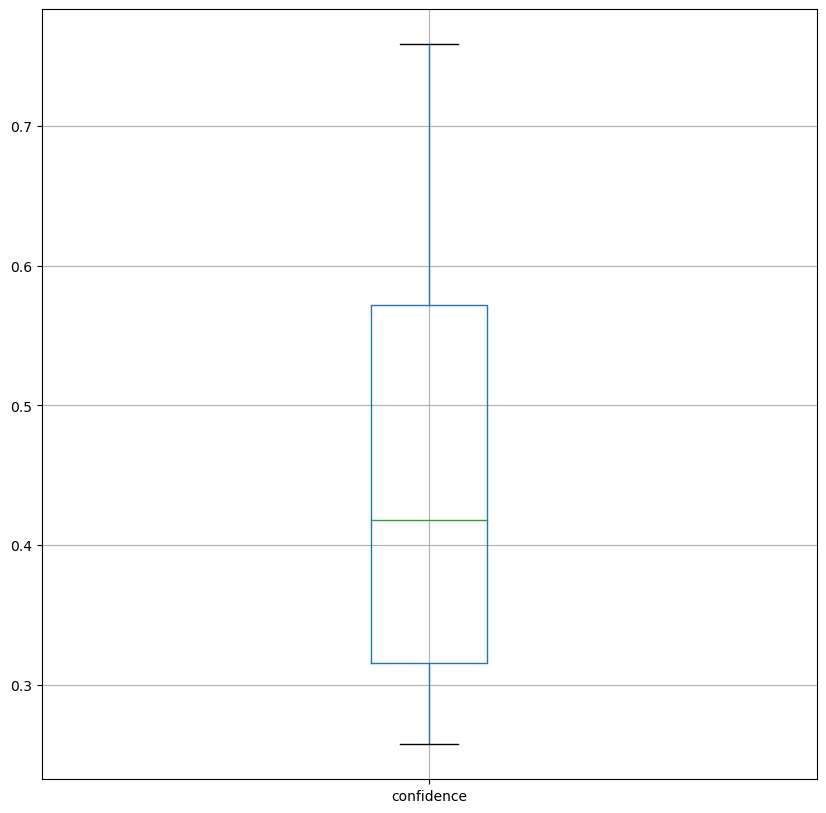

In [95]:
rules_c_triathlon[['confidence']].boxplot()

In [96]:
rules_l_triathlon = association_rules(triathlon_frequent_keyword, metric="lift", min_threshold=2)
rules_l_triathlon.sort_values('lift', ascending = False, inplace = True)
rules_l_triathlon

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
21,(suit),(tri),0.015,0.082,0.009,0.600000,7.317073,0.007770,2.295000,0.876481
20,(tri),(suit),0.082,0.015,0.009,0.109756,7.317073,0.007770,1.106438,0.940450
30,"(bike, swim)",(run),0.026,0.064,0.012,0.461538,7.211538,0.010336,1.738286,0.884326
31,(run),"(bike, swim)",0.064,0.026,0.012,0.187500,7.211538,0.010336,1.198769,0.920228
8,(km),(run),0.031,0.064,0.010,0.322581,5.040323,0.008016,1.381714,0.827245
9,(run),(km),0.064,0.031,0.010,0.156250,5.040323,0.008016,1.148444,0.856410
33,(swim),"(run, bike)",0.101,0.025,0.012,0.118812,4.752475,0.009475,1.106461,0.878291
28,"(run, bike)",(swim),0.025,0.101,0.012,0.480000,4.752475,0.009475,1.728846,0.809829
15,(training),(plan),0.091,0.037,0.016,0.175824,4.752005,0.012633,1.168440,0.868606
14,(plan),(training),0.037,0.091,0.016,0.432432,4.752005,0.012633,1.601571,0.819899


<Axes: >

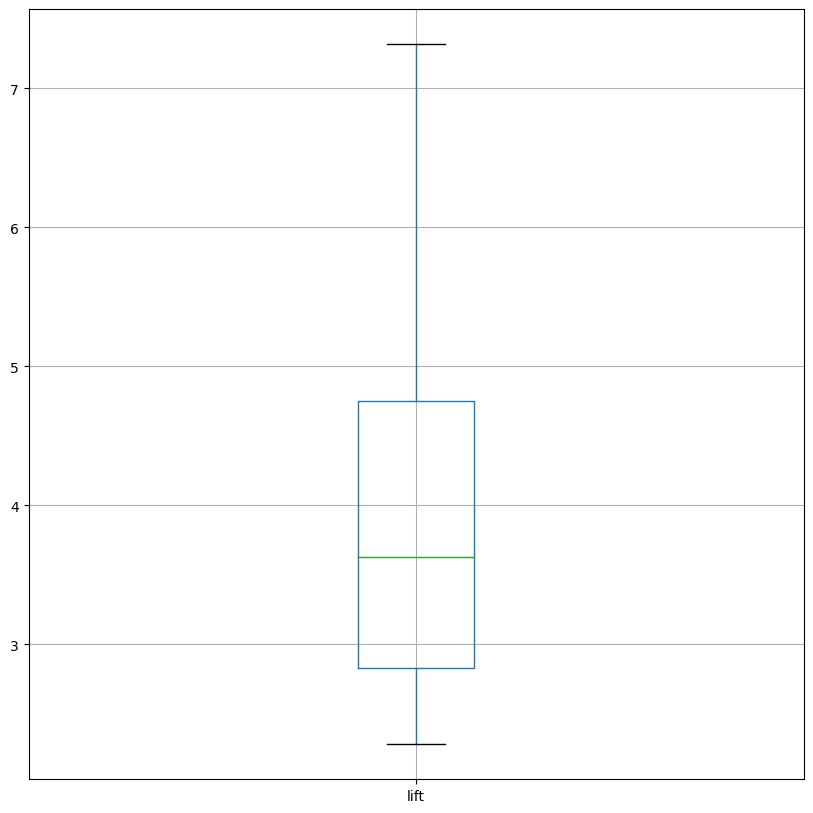

In [97]:
rules_l_triathlon[['lift']].boxplot()

In [98]:
# Both thresholds
# Option A
rules_c_triathlon[ (rules_c_triathlon['lift'] >= 3) &
       (rules_c_triathlon['confidence'] >= 0.3) ]

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
4,(road),(bike),0.029,0.209,0.022,0.758621,3.629764,0.015939,3.277000,0.746138
18,"(run, swim)",(bike),0.017,0.209,0.012,0.705882,3.377428,0.008447,2.689400,0.716090
8,(tt),(bike),0.016,0.209,0.011,0.687500,3.289474,0.007656,2.531200,0.707317
14,(suit),(tri),0.015,0.082,0.009,0.600000,7.317073,0.007770,2.295000,0.876481
17,"(run, bike)",(swim),0.025,0.101,0.012,0.480000,4.752475,0.009475,1.728846,0.809829
19,"(bike, swim)",(run),0.026,0.064,0.012,0.461538,7.211538,0.010336,1.738286,0.884326
11,(plan),(training),0.037,0.091,0.016,0.432432,4.752005,0.012633,1.601571,0.819899
16,(water),(swim),0.033,0.101,0.014,0.424242,4.200420,0.010667,1.561421,0.787930
15,(swimming),(swim),0.034,0.101,0.014,0.411765,4.076878,0.010566,1.528300,0.781278
9,(km),(run),0.031,0.064,0.010,0.322581,5.040323,0.008016,1.381714,0.827245


In [99]:
triathlon_frequent_keyword=apriori(triathlon_keyword_encoded, min_support = 0.009, use_colnames = True)
rules_c_triathlon = association_rules(triathlon_frequent_keyword, metric="confidence", min_threshold=0.25)
rules_c_triathlon[ (rules_c_triathlon['lift'] >= 3) &
       (rules_c_triathlon['confidence'] >= 0.3) ]

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
4,(road),(bike),0.029,0.209,0.022,0.758621,3.629764,0.015939,3.277000,0.746138
8,(tt),(bike),0.016,0.209,0.011,0.687500,3.289474,0.007656,2.531200,0.707317
9,(km),(run),0.031,0.064,0.010,0.322581,5.040323,0.008016,1.381714,0.827245
11,(plan),(training),0.037,0.091,0.016,0.432432,4.752005,0.012633,1.601571,0.819899
14,(suit),(tri),0.015,0.082,0.009,0.600000,7.317073,0.007770,2.295000,0.876481
15,(swimming),(swim),0.034,0.101,0.014,0.411765,4.076878,0.010566,1.528300,0.781278
16,(water),(swim),0.033,0.101,0.014,0.424242,4.200420,0.010667,1.561421,0.787930
17,"(run, bike)",(swim),0.025,0.101,0.012,0.480000,4.752475,0.009475,1.728846,0.809829
18,"(run, swim)",(bike),0.017,0.209,0.012,0.705882,3.377428,0.008447,2.689400,0.716090
19,"(bike, swim)",(run),0.026,0.064,0.012,0.461538,7.211538,0.010336,1.738286,0.884326


### 2.2.3.4 Judo

In [100]:
#Filter out all judo keywords in the dataframe
judo_data = data[data['category'] == 'judo']
judo_keywords_df = judo_data.iloc[:, 9: ]
judo_keywords_list = pd.Series([])
for col in judo_keywords_df:
    judo_keywords_list = judo_keywords_list.append(judo_keywords_df[col].dropna())

print(judo_keywords_list)
print(judo_keywords_list.shape)

4             judo
5              uni
6          bruised
11            duck
18      groundwork
           ...    
4954          judo
4965          judo
4975         ukemi
4986        aspect
4991         enter
Length: 7000, dtype: object
(7000,)


C:\Users\huang\AppData\Local\Temp\ipykernel_5260\1569176741.py:4: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  judo_keywords_list = pd.Series([])
C:\Users\huang\AppData\Local\Temp\ipykernel_5260\1569176741.py:6: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  judo_keywords_list = judo_keywords_list.append(judo_keywords_df[col].dropna())
C:\Users\huang\AppData\Local\Temp\ipykernel_5260\1569176741.py:6: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  judo_keywords_list = judo_keywords_list.append(judo_keywords_df[col].dropna())
C:\Users\huang\AppData\Local\Temp\ipykernel_5260\1569176741.py:6: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. U

C:\Users\huang\anaconda3\Lib\site-packages\wordcloud\wordcloud.py:106: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  self.colormap = plt.cm.get_cmap(colormap)


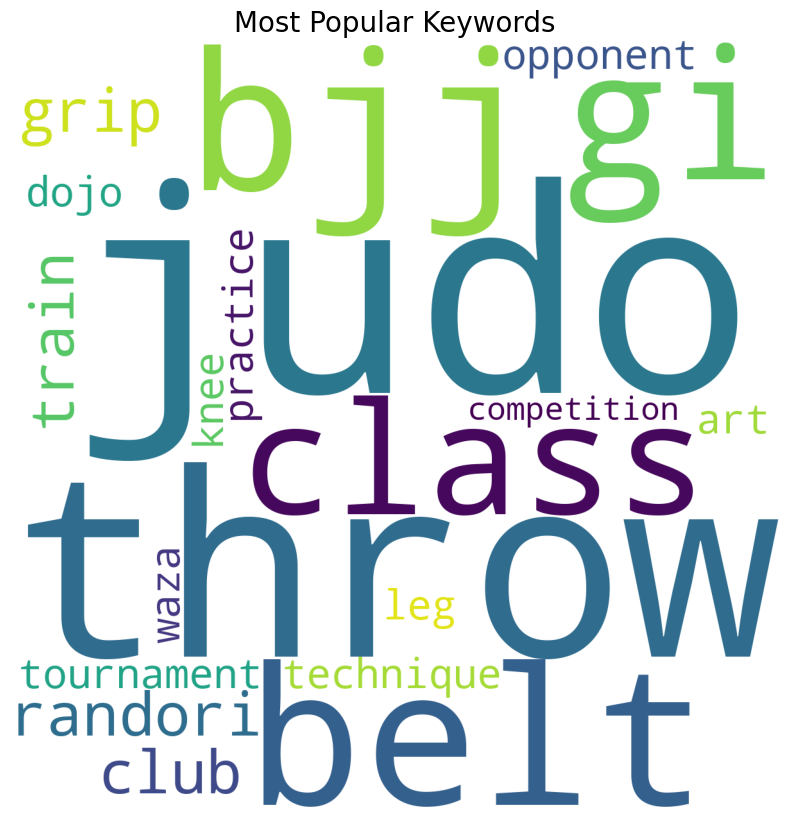

In [101]:
plt.rcParams['figure.figsize'] = (10, 10)
wordcloud = WordCloud(background_color='white', width=1200,
                      height=1200, max_words=20).generate(str(judo_keywords_list.value_counts().head(20)))
plt.imshow(wordcloud)
plt.axis('off')
plt.title('Most Popular Keywords', fontsize=20)
plt.show()

In [102]:
print(judo_keywords_list.value_counts())

judo        242
throw        98
bjj          85
belt         84
gi           45
           ... 
estimate      1
popular       1
care          1
slower        1
posting       1
Length: 2332, dtype: int64


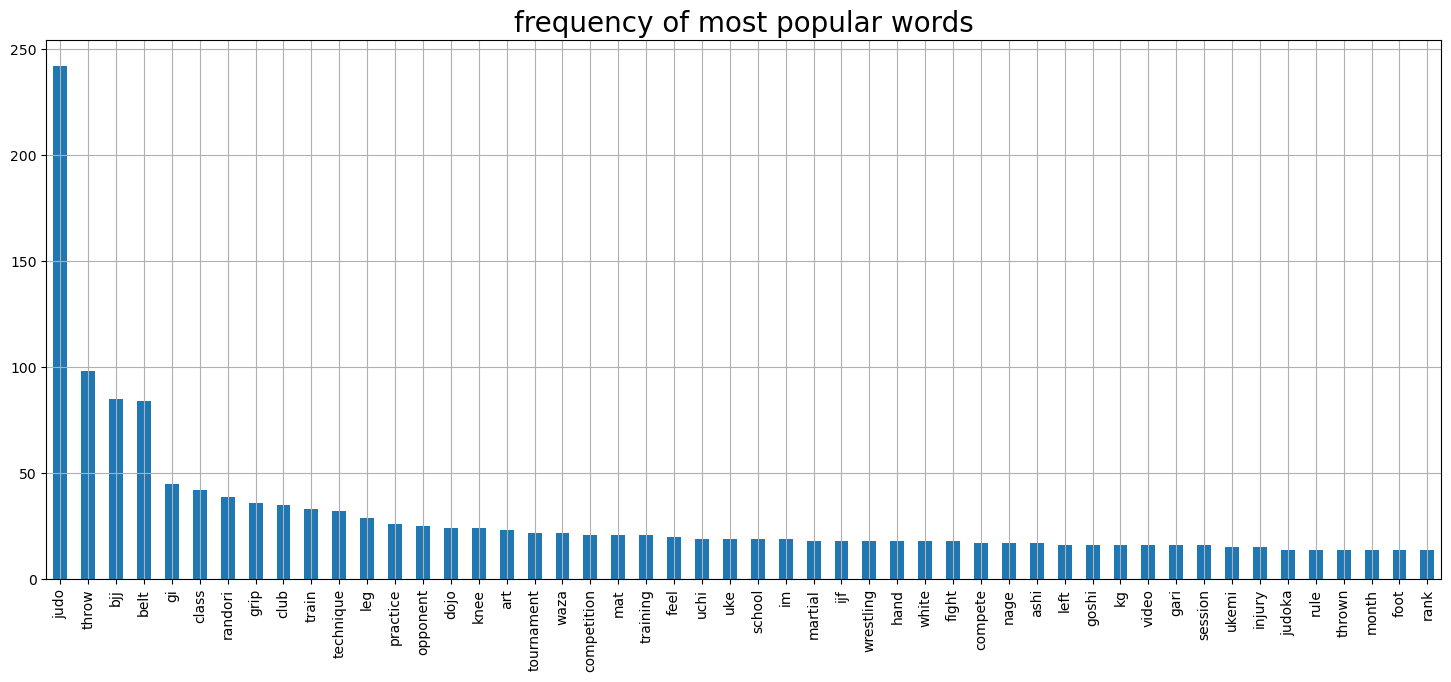

In [103]:
plt.figure(figsize=(18, 7))
judo_keywords_list.value_counts().head(50).plot.bar()
plt.title('frequency of most popular words', fontsize=20)
plt.xticks(rotation=90)
plt.grid()
plt.show()

### 2.2.3.4.1  Preprocess the Data

In [104]:
judo_keyword = []
for i in range(0, 1000):
    judo_keyword.append([str(judo_keywords_df.values[i, j]) for j in range(0, topn)])

judo_keyword = np.array(judo_keyword)
print("Tranformed list Shape:")
print(judo_keyword.shape)

judo_te = TransactionEncoder()
judo_keyword_encoded = judo_te.fit_transform(judo_keyword)
judo_keyword_encoded = pd.DataFrame(judo_keyword_encoded, columns = judo_te.columns_)

# getting the shape of the data
print("Data Encoded Shape:")
print(judo_keyword_encoded.shape)

Tranformed list Shape:
(1000, 7)
Data Encoded Shape:
(1000, 2332)


### 2.2.3.4.2 Generate frequent itemsets using Apriori algorithm for Judo

In [105]:
judo_frequent_keyword=apriori(judo_keyword_encoded, min_support = 0.009, use_colnames = True)
judo_frequent_keyword

,support,itemsets
0,0.011,(adult)
1,0.013,(arm)
2,0.023,(art)
3,0.017,(ashi)
4,0.084,(belt)
...,...,...
130,0.009,"(judo, school)"
131,0.010,"(judo, throw)"
132,0.009,"(judo, train)"
133,0.010,"(mata, uchi)"


In [106]:
judo_frequent_keyword[['support']].describe()

,support
count,135.000000
mean,0.018244
std,0.023660
min,0.009000
25%,0.010000
50%,0.012000
75%,0.018000
max,0.242000


### 2.2.3.4.3 Generate Association Rules for Judo

In [107]:
rules_c_judo = association_rules(judo_frequent_keyword, metric="confidence", min_threshold=0.3)
rules_c_judo.sort_values('confidence', ascending = False, inplace = True)
rules_c_judo

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
4,(green),(belt),0.009,0.084,0.009,1.000000,11.904762,0.008244,inf,0.924319
10,(mata),(uchi),0.010,0.019,0.010,1.000000,52.631579,0.009810,inf,0.990909
3,(black),(belt),0.012,0.084,0.010,0.833333,9.920635,0.008992,5.496000,0.910121
2,(martial),(art),0.018,0.023,0.014,0.777778,33.816425,0.013586,4.396500,0.988216
6,(bjj),(judo),0.085,0.242,0.059,0.694118,2.868255,0.038430,2.478077,0.711864
12,(seoi),(nage),0.013,0.017,0.009,0.692308,40.723982,0.008779,3.194750,0.988292
5,(white),(belt),0.018,0.084,0.012,0.666667,7.936508,0.010488,2.748000,0.890020
1,(art),(martial),0.023,0.018,0.014,0.608696,33.816425,0.013586,2.509556,0.993274
13,(nage),(seoi),0.017,0.013,0.009,0.529412,40.723982,0.008779,2.097375,0.992314
11,(uchi),(mata),0.019,0.010,0.010,0.526316,52.631579,0.009810,2.090000,1.000000


<Axes: >

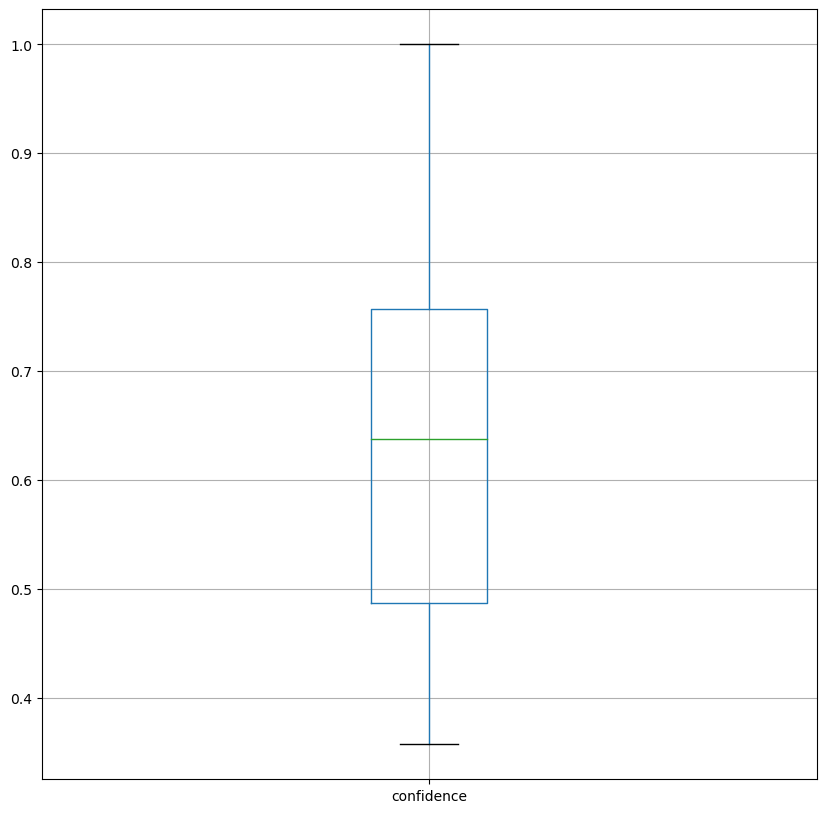

In [108]:
rules_c_judo[['confidence']].boxplot()

In [109]:
rules_l_judo = association_rules(judo_frequent_keyword, metric="lift", min_threshold=6)
rules_l_judo.sort_values('lift', ascending = False, inplace = True)
rules_l_judo

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
8,(mata),(uchi),0.010,0.019,0.010,1.000000,52.631579,0.009810,inf,0.990909
9,(uchi),(mata),0.019,0.010,0.010,0.526316,52.631579,0.009810,2.090000,1.000000
10,(seoi),(nage),0.013,0.017,0.009,0.692308,40.723982,0.008779,3.194750,0.988292
11,(nage),(seoi),0.017,0.013,0.009,0.529412,40.723982,0.008779,2.097375,0.992314
0,(art),(martial),0.023,0.018,0.014,0.608696,33.816425,0.013586,2.509556,0.993274
1,(martial),(art),0.018,0.023,0.014,0.777778,33.816425,0.013586,4.396500,0.988216
4,(green),(belt),0.009,0.084,0.009,1.000000,11.904762,0.008244,inf,0.924319
5,(belt),(green),0.084,0.009,0.009,0.107143,11.904762,0.008244,1.109920,1.000000
3,(black),(belt),0.012,0.084,0.010,0.833333,9.920635,0.008992,5.496000,0.910121
2,(belt),(black),0.084,0.012,0.010,0.119048,9.920635,0.008992,1.121514,0.981659


<Axes: >

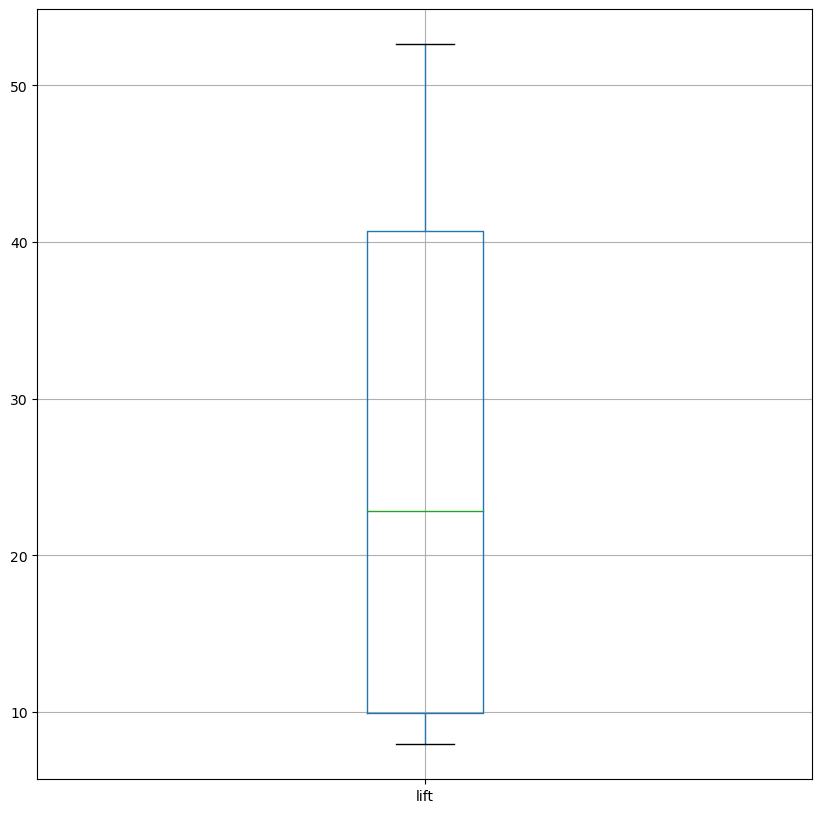

In [110]:
rules_l_judo[['lift']].boxplot()

In [111]:
# Both thresholds
# Option A
rules_c_judo[ (rules_c_judo['lift'] >= 7) &
       (rules_c_judo['confidence'] >= 0.35) ]

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
4,(green),(belt),0.009,0.084,0.009,1.000000,11.904762,0.008244,inf,0.924319
10,(mata),(uchi),0.010,0.019,0.010,1.000000,52.631579,0.009810,inf,0.990909
3,(black),(belt),0.012,0.084,0.010,0.833333,9.920635,0.008992,5.496000,0.910121
2,(martial),(art),0.018,0.023,0.014,0.777778,33.816425,0.013586,4.396500,0.988216
12,(seoi),(nage),0.013,0.017,0.009,0.692308,40.723982,0.008779,3.194750,0.988292
5,(white),(belt),0.018,0.084,0.012,0.666667,7.936508,0.010488,2.748000,0.890020
1,(art),(martial),0.023,0.018,0.014,0.608696,33.816425,0.013586,2.509556,0.993274
13,(nage),(seoi),0.017,0.013,0.009,0.529412,40.723982,0.008779,2.097375,0.992314
11,(uchi),(mata),0.019,0.010,0.010,0.526316,52.631579,0.009810,2.090000,1.000000


In [112]:
judo_frequent_keyword=apriori(judo_keyword_encoded, min_support = 0.009, use_colnames = True)
rules_c_judo = association_rules(judo_frequent_keyword, metric="confidence", min_threshold=0.3)
rules_c_judo[ (rules_c_judo['lift'] >= 7) &
       (rules_c_judo['confidence'] >= 0.35) ]

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
1,(art),(martial),0.023,0.018,0.014,0.608696,33.816425,0.013586,2.509556,0.993274
2,(martial),(art),0.018,0.023,0.014,0.777778,33.816425,0.013586,4.396500,0.988216
3,(black),(belt),0.012,0.084,0.010,0.833333,9.920635,0.008992,5.496000,0.910121
4,(green),(belt),0.009,0.084,0.009,1.000000,11.904762,0.008244,inf,0.924319
5,(white),(belt),0.018,0.084,0.012,0.666667,7.936508,0.010488,2.748000,0.890020
10,(mata),(uchi),0.010,0.019,0.010,1.000000,52.631579,0.009810,inf,0.990909
11,(uchi),(mata),0.019,0.010,0.010,0.526316,52.631579,0.009810,2.090000,1.000000
12,(seoi),(nage),0.013,0.017,0.009,0.692308,40.723982,0.008779,3.194750,0.988292
13,(nage),(seoi),0.017,0.013,0.009,0.529412,40.723982,0.008779,2.097375,0.992314


### 2.2.3.5 Surfing

In [113]:
#Filter out all surfing keywords in the dataframe
surfing_data = data[data['category'] == 'surfing']
surfing_keywords_df = surfing_data.iloc[:, 9: ]
print(surfing_data.iloc[:, 9: ])
surfing_keywords_list = pd.Series([])
for col in surfing_keywords_df:
    surfing_keywords_list = surfing_keywords_list.append(surfing_keywords_df[col].dropna())

print(surfing_keywords_list)
print(surfing_keywords_list.shape)

              0             1         2           3          4         5  \
8        shaper  relationship    awhile        cruz      arena   trigger   
21    essential     billabong      suit        seam      stack       wtf   
22       hybrid      deciding   towards          ww      hypto       joe   
26          fin       fastest  generate    deciding  dimension  powerful   
30       unique          spot      pier       bored         nj     usual   
...         ...           ...       ...         ...        ...       ...   
4983     hiking      spending      wind     heading   whatever   morning   
4989     length        seller    eyeing     ventura   choosing     mushy   
4993  nicaragua          nica   surfing     capable   november    friend   
4995    walking        puerto    hostel      safety      value     store   
4998         ci     forgiving       joe  shortboard    average     board   

              6  
8         santa  
21    clearance  
22    instagram  
26      suppose

C:\Users\huang\AppData\Local\Temp\ipykernel_5260\2678797041.py:5: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  surfing_keywords_list = pd.Series([])
C:\Users\huang\AppData\Local\Temp\ipykernel_5260\2678797041.py:7: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  surfing_keywords_list = surfing_keywords_list.append(surfing_keywords_df[col].dropna())
C:\Users\huang\AppData\Local\Temp\ipykernel_5260\2678797041.py:7: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  surfing_keywords_list = surfing_keywords_list.append(surfing_keywords_df[col].dropna())
C:\Users\huang\AppData\Local\Temp\ipykernel_5260\2678797041.py:7: FutureWarning: The series.append method is deprecated and will be removed from pandas i

C:\Users\huang\anaconda3\Lib\site-packages\wordcloud\wordcloud.py:106: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  self.colormap = plt.cm.get_cmap(colormap)


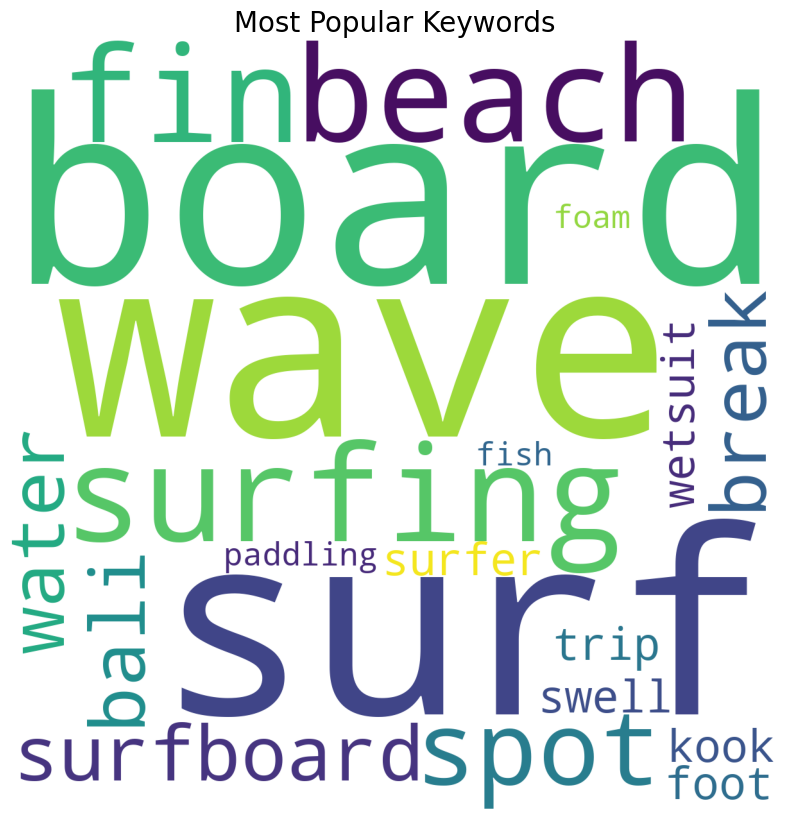

In [114]:
plt.rcParams['figure.figsize'] = (10, 10)
wordcloud = WordCloud(background_color='white', width=1200,
                      height=1200, max_words=20).generate(str(surfing_keywords_list.value_counts().head(20)))
plt.imshow(wordcloud)
plt.axis('off')
plt.title('Most Popular Keywords', fontsize=20)
plt.show()

In [115]:
print(surfing_keywords_list.value_counts())

board       144
surf        123
wave        116
surfing      82
beach        47
           ... 
learnt        1
spoke         1
compared      1
checkout      1
safe          1
Length: 2441, dtype: int64


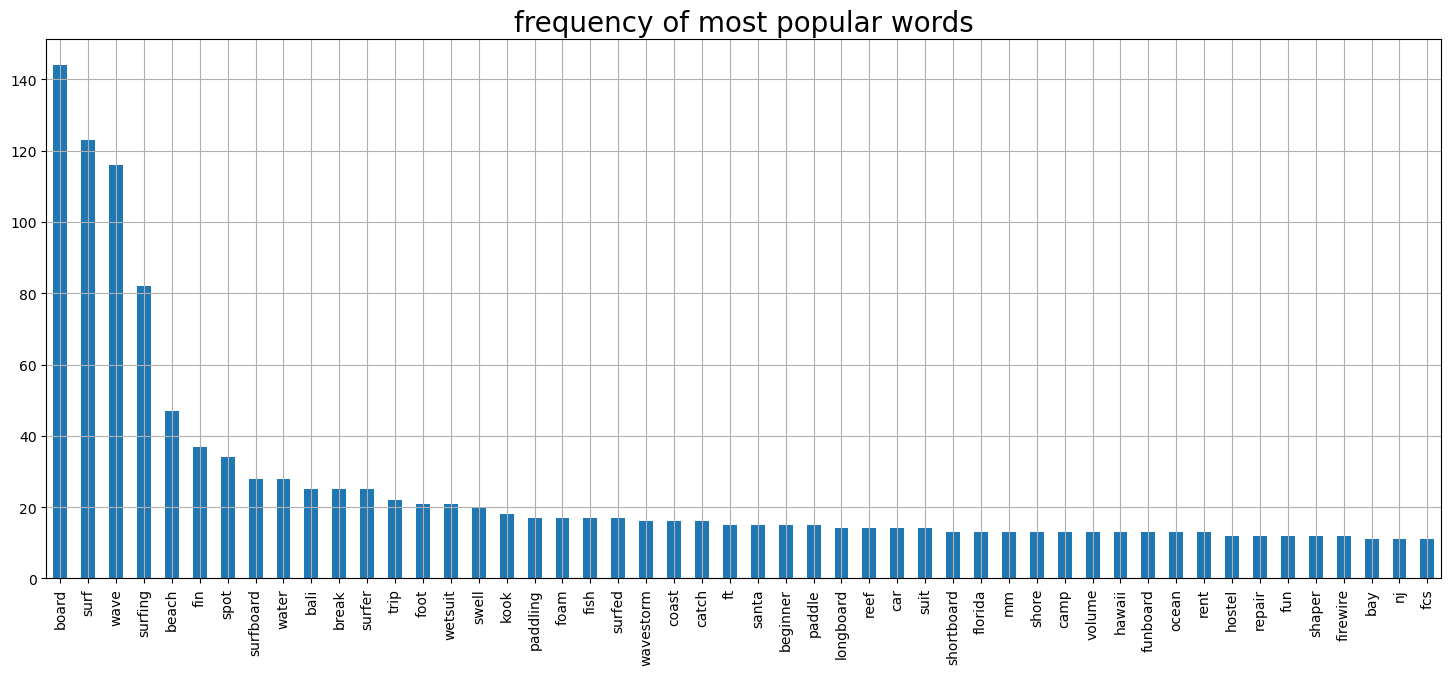

In [116]:
plt.figure(figsize=(18, 7))
surfing_keywords_list.value_counts().head(50).plot.bar()
plt.title('frequency of most popular words', fontsize=20)
plt.xticks(rotation=90)
plt.grid()
plt.show()

### 2.2.3.5.1  Preprocess the Data

In [117]:
surfing_keyword = []
for i in range(0, 1000):
    surfing_keyword.append([str(surfing_keywords_df.values[i, j]) for j in range(0, topn)])

surfing_keyword = np.array(surfing_keyword)
print("Tranformed list Shape:")
print(surfing_keyword.shape)

surfing_te = TransactionEncoder()
surfing_keyword_encoded = surfing_te.fit_transform(surfing_keyword)
surfing_keyword_encoded = pd.DataFrame(surfing_keyword_encoded, columns = surfing_te.columns_)

# getting the shape of the data
print("Data Encoded Shape:")
print(surfing_keyword_encoded.shape)

Tranformed list Shape:
(1000, 7)
Data Encoded Shape:
(1000, 2441)


### 2.2.3.5.2 Generate frequent itemsets using Apriori algorithm for Surfing

In [118]:
surfing_frequent_keyword=apriori(surfing_keyword_encoded, min_support = 0.007, use_colnames = True)
surfing_frequent_keyword

,support,itemsets
0,0.007,(able)
1,0.008,(advice)
2,0.007,(amp)
3,0.007,(awesome)
4,0.007,(baja)
...,...,...
197,0.008,"(paddle, wave)"
198,0.009,"(surf, surfing)"
199,0.015,"(surf, wave)"
200,0.007,"(surfer, wave)"


In [119]:
surfing_frequent_keyword[['support']].describe()

,support
count,202.000000
mean,0.012535
std,0.016069
min,0.007000
25%,0.007000
50%,0.009000
75%,0.011000
max,0.144000


### 2.2.3.5.3 Generate Association Rules for Surfing

In [120]:
rules_c_surfing = association_rules(surfing_frequent_keyword, metric="confidence", min_threshold=0.25)
rules_c_surfing.sort_values('confidence', ascending = False, inplace = True)
rules_c_surfing

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
8,(cruz),(santa),0.010,0.015,0.009,0.900000,60.000000,0.008850,9.850000,0.993266
3,(box),(fin),0.008,0.037,0.007,0.875000,23.648649,0.006704,7.704000,0.965438
7,(santa),(cruz),0.015,0.010,0.009,0.600000,60.000000,0.008850,2.475000,0.998308
6,(catch),(wave),0.016,0.116,0.009,0.562500,4.849138,0.007144,2.020571,0.806685
1,(shortboard),(board),0.013,0.144,0.007,0.538462,3.739316,0.005128,1.854667,0.742220
5,(camp),(surf),0.013,0.123,0.007,0.538462,4.377736,0.005401,1.900167,0.781734
10,(paddle),(wave),0.015,0.116,0.008,0.533333,4.597701,0.006260,1.894286,0.794416
0,(fish),(board),0.017,0.144,0.007,0.411765,2.859477,0.004552,1.455200,0.661532
2,(surfboard),(board),0.028,0.144,0.010,0.357143,2.480159,0.005968,1.331556,0.613992
9,(foot),(wave),0.021,0.116,0.007,0.333333,2.873563,0.004564,1.326000,0.665986


<Axes: >

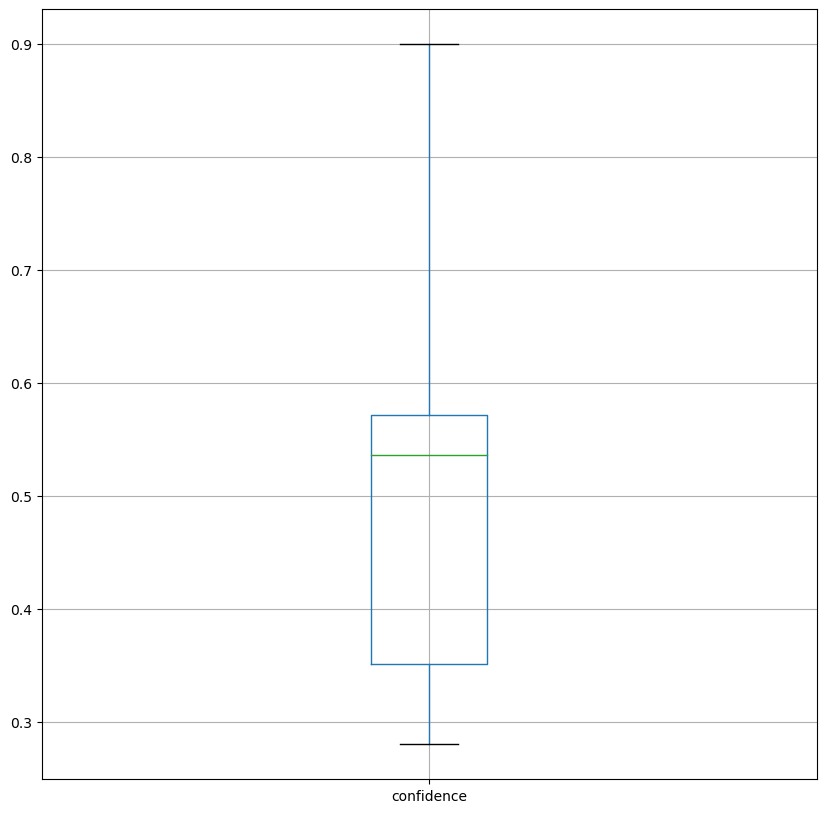

In [121]:
rules_c_surfing[['confidence']].boxplot()

In [122]:
rules_l_surfing = association_rules(surfing_frequent_keyword, metric="lift", min_threshold=1)
rules_l_surfing.sort_values('lift', ascending = False, inplace = True)
rules_l_surfing

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
24,(santa),(cruz),0.015,0.010,0.009,0.600000,60.000000,0.008850,2.475000,0.998308
25,(cruz),(santa),0.010,0.015,0.009,0.900000,60.000000,0.008850,9.850000,0.993266
16,(box),(fin),0.008,0.037,0.007,0.875000,23.648649,0.006704,7.704000,0.965438
17,(fin),(box),0.037,0.008,0.007,0.189189,23.648649,0.006704,1.223467,0.994511
23,(wave),(catch),0.116,0.016,0.009,0.077586,4.849138,0.007144,1.066766,0.897939
22,(catch),(wave),0.016,0.116,0.009,0.562500,4.849138,0.007144,2.020571,0.806685
29,(wave),(paddle),0.116,0.015,0.008,0.068966,4.597701,0.006260,1.057963,0.885181
28,(paddle),(wave),0.015,0.116,0.008,0.533333,4.597701,0.006260,1.894286,0.794416
21,(camp),(surf),0.013,0.123,0.007,0.538462,4.377736,0.005401,1.900167,0.781734
20,(surf),(camp),0.123,0.013,0.007,0.056911,4.377736,0.005401,1.046560,0.879785


<Axes: >

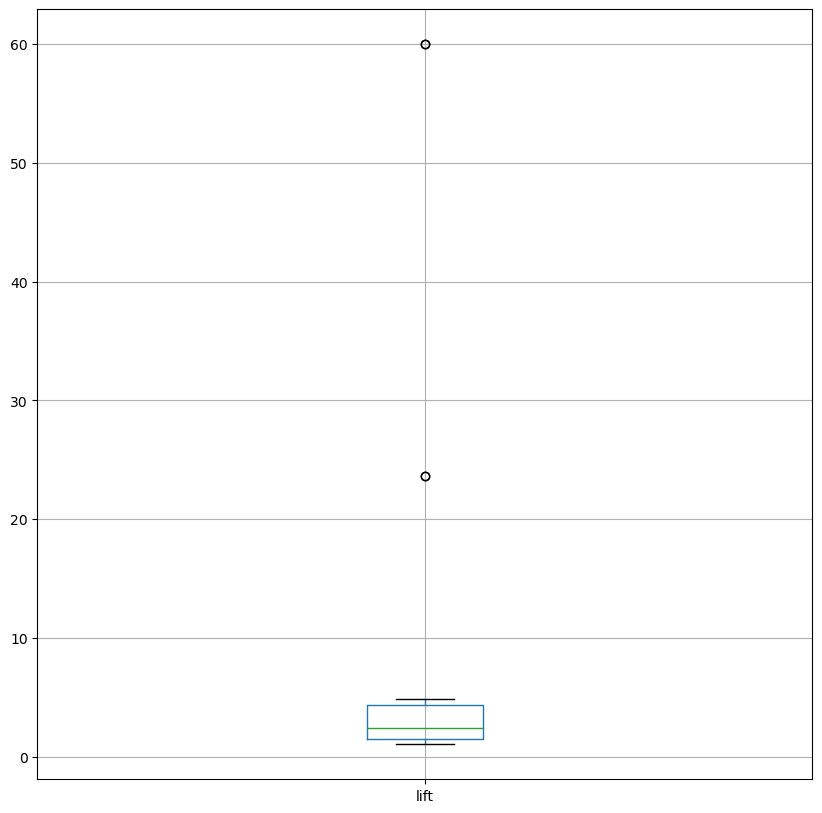

In [123]:
rules_l_surfing[['lift']].boxplot()

In [124]:
# Both thresholds
# Option A
rules_c_surfing[ (rules_c_surfing['lift'] >= 2) &
       (rules_c_surfing['confidence'] >= 0.3) ]

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
8,(cruz),(santa),0.010,0.015,0.009,0.900000,60.000000,0.008850,9.850000,0.993266
3,(box),(fin),0.008,0.037,0.007,0.875000,23.648649,0.006704,7.704000,0.965438
7,(santa),(cruz),0.015,0.010,0.009,0.600000,60.000000,0.008850,2.475000,0.998308
6,(catch),(wave),0.016,0.116,0.009,0.562500,4.849138,0.007144,2.020571,0.806685
1,(shortboard),(board),0.013,0.144,0.007,0.538462,3.739316,0.005128,1.854667,0.742220
5,(camp),(surf),0.013,0.123,0.007,0.538462,4.377736,0.005401,1.900167,0.781734
10,(paddle),(wave),0.015,0.116,0.008,0.533333,4.597701,0.006260,1.894286,0.794416
0,(fish),(board),0.017,0.144,0.007,0.411765,2.859477,0.004552,1.455200,0.661532
2,(surfboard),(board),0.028,0.144,0.010,0.357143,2.480159,0.005968,1.331556,0.613992
9,(foot),(wave),0.021,0.116,0.007,0.333333,2.873563,0.004564,1.326000,0.665986


In [125]:
surfing_frequent_keyword=apriori(surfing_keyword_encoded, min_support = 0.007, use_colnames = True)
rules_c_surfing = association_rules(surfing_frequent_keyword, metric="confidence", min_threshold=0.25)
rules_c_surfing[ (rules_c_surfing['lift'] >= 2) &
       (rules_c_surfing['confidence'] >= 0.3) ]

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,(fish),(board),0.017,0.144,0.007,0.411765,2.859477,0.004552,1.455200,0.661532
1,(shortboard),(board),0.013,0.144,0.007,0.538462,3.739316,0.005128,1.854667,0.742220
2,(surfboard),(board),0.028,0.144,0.010,0.357143,2.480159,0.005968,1.331556,0.613992
3,(box),(fin),0.008,0.037,0.007,0.875000,23.648649,0.006704,7.704000,0.965438
5,(camp),(surf),0.013,0.123,0.007,0.538462,4.377736,0.005401,1.900167,0.781734
6,(catch),(wave),0.016,0.116,0.009,0.562500,4.849138,0.007144,2.020571,0.806685
7,(santa),(cruz),0.015,0.010,0.009,0.600000,60.000000,0.008850,2.475000,0.998308
8,(cruz),(santa),0.010,0.015,0.009,0.900000,60.000000,0.008850,9.850000,0.993266
9,(foot),(wave),0.021,0.116,0.007,0.333333,2.873563,0.004564,1.326000,0.665986
10,(paddle),(wave),0.015,0.116,0.008,0.533333,4.597701,0.006260,1.894286,0.794416


# Problem2

## 3. Classification Modeling

### 3.1 Sample the data

In [126]:
y = data['category'].map({'soccer': 0, 'snowboarding': 1, 'triathlon': 2, 'judo': 3, 'surfing': 4 }).astype(int)


In [127]:
# Creating a base model and finding the best dataset for the model
# Uses Word Counts and TF-IDF matrix from every member as model input

datasets = ["HuangWen_WordCount.csv","HuangWen_tfidf.csv",
            #"Bernice_tfidf.csv", "Bernice_WordCount.csv", 
            "WongJiaYi_tfidf.csv", "WongJiaYi_WordCount.csv",
            "Ernest_tfidf.csv", "Ernest_WordCount.csv"]

best_dataset = ""
max_accuracy = 0
all_accuracies = []


for data in datasets:
    X = pd.read_csv(data)
    
    #Find Mean Cross-Validation Accuracy
    X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=2)
    lr = LogisticRegression(solver="lbfgs", max_iter=1000)
    training_scores = cross_val_score(lr, X_train, y_train, cv=5)
    training_score = np.mean(training_scores)
    all_accuracies.append(training_score)
    
    if training_score > max_accuracy:
        max_accuracy = training_score
        best_dataset = data
        
    
    print("Dataset: " + data)
    print("Mean Cross-Validation Accuracy: {:.3f}%".format(training_score * 100))
    print("")

Dataset: HuangWen_WordCount.csv
Mean Cross-Validation Accuracy: 95.743%

Dataset: HuangWen_tfidf.csv
Mean Cross-Validation Accuracy: 96.914%

Dataset: WongJiaYi_tfidf.csv
Mean Cross-Validation Accuracy: 96.914%

Dataset: WongJiaYi_WordCount.csv
Mean Cross-Validation Accuracy: 95.743%

Dataset: Ernest_tfidf.csv
Mean Cross-Validation Accuracy: 96.914%

Dataset: Ernest_WordCount.csv
Mean Cross-Validation Accuracy: 95.743%



In [128]:
print("Best dataset: " + best_dataset)
print("Accuracy (Cross-Validation): {:.3f}%".format(max_accuracy * 100))

Best dataset: HuangWen_tfidf.csv
Accuracy (Cross-Validation): 96.914%


### 3.2 Build the Model(s)

In [147]:
X = pd.read_csv(best_dataset)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=2)
model = LogisticRegression()
model.fit(X_train, y_train)
print('train_acc: ', model.score(X_train, y_train))
print('test_acc: ', model.score(X_test, y_test))

train_acc:  0.996
test_acc:  0.9733333333333334


In [148]:
y_pred = model.predict(X_test)

print(accuracy_score(y_test,y_pred))
print("\n")
print(confusion_matrix(y_test, y_pred, labels =[0, 1, 2, 3, 4]))
print("\n")
print(classification_report(y_test, y_pred))

0.9733333333333334


[[311   0   0   1   0]
 [  1 300   1   0   8]
 [  0   5 295   0   3]
 [  4   2   1 267   3]
 [  0   7   3   1 287]]


              precision    recall  f1-score   support

           0       0.98      1.00      0.99       312
           1       0.96      0.97      0.96       310
           2       0.98      0.97      0.98       303
           3       0.99      0.96      0.98       277
           4       0.95      0.96      0.96       298

    accuracy                           0.97      1500
   macro avg       0.97      0.97      0.97      1500
weighted avg       0.97      0.97      0.97      1500



In [149]:
X = pd.read_csv(best_dataset)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)
model = RandomForestClassifier(random_state=2)
model.fit(X_train, y_train)

print('train_acc: ', model.score(X_train, y_train))
print('test_acc: ', model.score(X_test, y_test))

train_acc:  1.0
test_acc:  0.955


In [150]:
y_pred = model.predict(X_test)

print(accuracy_score(y_test,y_pred))
print("\n")
print(confusion_matrix(y_test, y_pred, labels =[0, 1, 2, 3, 4]))
print("\n")
print(classification_report(y_test, y_pred))

0.955


[[194   5   0   1   0]
 [  1 188   0   3   9]
 [  0   6 184   0   3]
 [  2   4   0 192   0]
 [  2   7   1   1 197]]


              precision    recall  f1-score   support

           0       0.97      0.97      0.97       200
           1       0.90      0.94      0.91       201
           2       0.99      0.95      0.97       193
           3       0.97      0.97      0.97       198
           4       0.94      0.95      0.94       208

    accuracy                           0.95      1000
   macro avg       0.96      0.96      0.96      1000
weighted avg       0.96      0.95      0.96      1000



X = pd.read_csv(best_dataset)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=2)
model = SVC()
model.fit(X_train, y_train)

print('train_acc: ', model.score(X_train, y_train))
print('test_acc: ', model.score(X_test, y_test))

X = pd.read_csv(best_dataset)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=2)
model = MultinomialNB()
model.fit(X_train, y_train)

print('train_acc: ', model.score(X_train, y_train))
print('test_acc: ', model.score(X_test, y_test))

X = pd.read_csv(best_dataset)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)
model = DecisionTreeClassifier(random_state=2)
model.fit(X_train, y_train)

print('train_acc: ', model.score(X_train, y_train))
print('test_acc: ', model.score(X_test, y_test))

### 3.3 Evaluate and Improve the Model(s)

In [151]:
#Hyperparameter tuning
#Use other parameter for testing to find the best combination of parameter that will yield the highest accuracy for our model

In [152]:
#Try other C value, solver and max_iteration to find the best parameters for lg model
X = pd.read_csv(best_dataset)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=2)
param_grid = {'C': [0.01, 0.1, 1, 2, 4, 10, 100], #Try different C value
'solver': ["newton-cg", "lbfgs", "sag", "saga"], #Only this four handles multi-class data
'max_iter': [50, 100, 200, 300]} #try other max_iteration

grid = GridSearchCV(LogisticRegression() , param_grid, cv=5, n_jobs=-1)
grid.fit(X_train, y_train)

#Getting the mean of the five scores.
print("Optimized cross validation training accuracy: {:.1f}%".format(
    grid.best_score_*100))
print("Best parameters: ", grid.best_params_)

Optimized cross validation training accuracy: 96.9%
Best parameters:  {'C': 1, 'max_iter': 50, 'solver': 'newton-cg'}


In [153]:
model = LogisticRegression(max_iter=50, solver="newton-cg", C = 1)
model.fit(X_train, y_train)
print('train_acc: ', model.score(X_train, y_train))
print('test_acc: ', model.score(X_test, y_test))

train_acc:  0.996
test_acc:  0.9733333333333334


In [154]:
print("Test score: {:.2f}".format(grid.score(X_test, y_test)))

Test score: 0.97


In [155]:
#Find the accuracy score, confusion matrix and classification report of the model
y_pred = model.predict(X_test)

print(accuracy_score(y_test,y_pred))
print("\n")
print(confusion_matrix(y_test, y_pred, labels =[0, 1, 2, 3, 4]))
print("\n")
print(classification_report(y_test, y_pred))

0.9733333333333334


[[311   0   0   1   0]
 [  1 300   1   0   8]
 [  0   5 295   0   3]
 [  4   2   1 267   3]
 [  0   7   3   1 287]]


              precision    recall  f1-score   support

           0       0.98      1.00      0.99       312
           1       0.96      0.97      0.96       310
           2       0.98      0.97      0.98       303
           3       0.99      0.96      0.98       277
           4       0.95      0.96      0.96       298

    accuracy                           0.97      1500
   macro avg       0.97      0.97      0.97      1500
weighted avg       0.97      0.97      0.97      1500



In [156]:
X = pd.read_csv(best_dataset)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)
param_grid = {
    "max_depth": [3, 5, 7, 10, 15, 20, 30],
    "n_estimators": [3, 5, 10, 25, 50, 100, 150, 200, 250],
    "max_features": ["sqrt", "log2"],
    "criterion": ["gini", "entropy"]
}

#Creating the classifier
model = RandomForestClassifier(random_state=2)
gs = GridSearchCV(model, param_grid=param_grid, cv=5, scoring='accuracy', verbose=4, n_jobs=-1)
gs.fit(X_train, y_train)
print(gs.best_score_)
print(gs.best_params_)

Fitting 5 folds for each of 252 candidates, totalling 1260 fits
0.9655000000000001
{'criterion': 'gini', 'max_depth': 20, 'max_features': 'log2', 'n_estimators': 250}


In [157]:
model = RandomForestClassifier(max_depth=20, n_estimators=250, random_state=2, 
                               criterion= 'gini', max_features= 'log2')
model.fit(X_train, y_train)
print('train_acc: ', model.score(X_train, y_train))
print('test_acc: ', model.score(X_test, y_test))

train_acc:  0.9915
test_acc:  0.966


In [158]:
print("Test score: {:.2f}".format(gs.score(X_test, y_test)))

Test score: 0.97


In [159]:
y_pred = model.predict(X_test)

print(accuracy_score(y_test,y_pred))
print("\n")
print(confusion_matrix(y_test, y_pred, labels =[0, 1, 2, 3, 4]))
print("\n")
print(classification_report(y_test, y_pred))

0.966


[[197   1   1   0   1]
 [  2 190   1   1   7]
 [  1   2 187   0   3]
 [  1   1   1 195   0]
 [  2   4   4   1 197]]


              precision    recall  f1-score   support

           0       0.97      0.98      0.98       200
           1       0.96      0.95      0.95       201
           2       0.96      0.97      0.97       193
           3       0.99      0.98      0.99       198
           4       0.95      0.95      0.95       208

    accuracy                           0.97      1000
   macro avg       0.97      0.97      0.97      1000
weighted avg       0.97      0.97      0.97      1000



X = pd.read_csv(best_dataset)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=2)
param_grid = {'C' : [0.001, 0.01, 0.1, 1, 10],
              'gamma' : ['scale', 'auto', 0.1, 1, 10]}

model = SVC()
gs = GridSearchCV(model, param_grid=param_grid, cv=5, n_jobs=-1)
gs.fit(X_train, y_train)

#Getting the mean of the five scores.
print("Optimized cross validation training accuracy: {:.1f}%".format(gs.best_score_*100))
print("Best parameters: ", gs.best_params_)

model = SVC( )
model.fit(X_train, y_train)
print('train_acc: ', model.score(X_train, y_train))
print('test_acc: ', model.score(X_test, y_test))

print("Test score: {:.2f}".format(gs.score(X_test, y_test)))

y_pred = model.predict(X_test)

print(accuracy_score(y_test,y_pred))
print("\n")
print(confusion_matrix(y_test, y_pred, labels =[0, 1, 2, 3, 4]))
print("\n")
print(classification_report(y_test, y_pred))

X = pd.read_csv(best_dataset)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=2)
param_grid = {'alpha': [0.1, 0.5, 1.0, 2.0],
              'fit_prior': [True, False],
              'class_prior': [None, [0.2, 0.3, 0.1, 0.2, 0.2]],}

model = MultinomialNB()

gs = GridSearchCV(model, param_grid=param_grid, cv=5, n_jobs=-1)
gs.fit(X_train, y_train)
#Getting the mean of the five scores.
print("Optimized cross validation training accuracy: {:.1f}%".format(
    gs.best_score_*100))
print("Best parameters: ", gs.best_params_)

model = MultinomialNB(alpha = 2, class_prior = None, fit_prior=True)
model.fit(X_train, y_train)
print('train_acc: ', model.score(X_train, y_train))
print('test_acc: ', model.score(X_test, y_test))

print("Test score: {:.2f}".format(gs.score(X_test, y_test)))

y_pred = model.predict(X_test)

print(accuracy_score(y_test,y_pred))
print("\n")
print(confusion_matrix(y_test, y_pred, labels =[0, 1, 2, 3, 4]))
print("\n")
print(classification_report(y_test, y_pred))

X = pd.read_csv(best_dataset)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)
param_grid = {'criterion': ['gini', 'entropy'],
              'splitter': ['best', 'random'],
              'max_depth': [3, 5, 7, 10, 15, 20, 30],
              'min_samples_split': [2, 5, 10],
              'min_samples_leaf': [1, 2, 4],
              'max_features': ['sqrt', 'log2']
             }

model = DecisionTreeClassifier(random_state=2)

gs = GridSearchCV(model, param_grid=param_grid, cv=5, scoring='accuracy', verbose=4, n_jobs=-1)
gs.fit(X_train, y_train)
#Getting the mean of the five scores.
print("Optimized cross validation training accuracy: {:.1f}%".format(
    gs.best_score_*100))
print("Best parameters: ", gs.best_params_)


model = DecisionTreeClassifier(max_depth=30, min_samples_split=2, random_state=2, min_samples_leaf =1,
                               splitter = 'best',
                               criterion= 'entropy', max_features= 'sqrt')
model.fit(X_train, y_train)
print('train_acc: ', model.score(X_train, y_train))
print('test_acc: ', model.score(X_test, y_test))

print("Test score: {:.2f}".format(gs.score(X_test, y_test)))

y_pred = model.predict(X_test)

print(accuracy_score(y_test,y_pred))
print("\n")
print(confusion_matrix(y_test, y_pred, labels =[0, 1, 2, 3, 4]))
print("\n")
print(classification_report(y_test, y_pred))